# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 4 #good
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path = 'data/ECMWF/chile/52S75W/dat.csv' # good
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/iceland/65N17W/dat.csv',  4 # good
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/iceland/65N17W/dat.csv', 4 # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path= 'data/ECMWF/sudan/18N32E/dat.csv' # good
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 5 # miss the peak

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, good accordance
# file_path, NUMBER_OF_GAUSSIAN= 'data/ECMWF/greece/37N22E/dat.csv', 4 #Pylos, Good accordance, good
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path, NUMBER_OF_GAUSSIAN= 'data/ECMWF/portugal/36N5W/dat.csv', 4 # Mar de Alboran, bad accordance

# USA Comparison
# # file_path = 'd:/data/ECMWF/47.25N102.75E/dat.csv' # Green R, bad accordance
# file_path= 'd:/data/ECMWF/48.75N98.25E/dat.csv' # Olga

# US offshore
# file_path = 'D:/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = True
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
#     convert_to_knot = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [4]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df

time        lat         lon         x         y  \
0     1979-01-01 00:00:00  47.000004  237.000015  2.647999  0.267029   
1     1979-01-01 06:00:00  47.000004  237.000015  3.995660 -0.144256   
2     1979-01-01 12:00:00  47.000004  237.000015  3.473003 -0.148026   
3     1979-01-01 18:00:00  47.000004  237.000015  4.140249 -0.252757   
4     1979-01-02 00:00:00  47.000004  237.000015  3.594884 -0.379231   
5     1979-01-02 06:00:00  47.000004  237.000015  2.746273 -0.223362   
6     1979-01-02 12:00:00  47.000004  237.000015  2.730588 -0.236722   
7     1979-01-02 18:00:00  47.000004  237.000015  3.165043 -0.074385   
8     1979-01-03 00:00:00  47.000004  237.000015  2.419378 -0.246756   
9     1979-01-03 06:00:00  47.000004  237.000015  2.862289 -0.340428   
10    1979-01-03 12:00:00  47.000004  237.000015  3.044513 -0.086254   
11    1979-01-03 18:00:00  47.000004  237.000015  3.830171  0.351548   
12    1979-01-04 00:00:00  47.000004  237.000015  3.335711  0.394578   
13    1979-01-04 06:00:00  47.000004  237.000015  4.174526  0.585728   
14    1979-01-04 12:00:00  47.000004  237.000015  4.058359  0.528861   
15    1979-01-04 18:00:00  47.000004  237.000015  4.325488  0.224195   
16    1979-01-05 00:00:00  47.000004  237.000015  3.402502  0.000142   
17    1979-01-05 06:00:00  47.000004  237.000015  3.837243  0.146394   
18    1979-01-05 12:00:00  47.000004  237.000015  4.046267  0.215382   
19    1979-01-05 18:00:00  47.000004  237.000015  4.108260  0.444252   
20    1979-01-06 00:00:00  47.000004  237.000015  3.349026  0.390269   
21    1979-01-06 06:00:00  47.000004  237.000015  3.633429  0.062893   
22    1979-01-06 12:00:00  47.000004  237.000015  3.118314 -0.074798   
23    1979-01-06 18:00:00  47.000004  237.000015  3.809524 -0.161539   
24    1979-01-07 00:00:00  47.000004  237.000015  3.085909 -0.192037   
25    1979-01-07 06:00:00  47.000004  237.000015  3.664690 -0.083538   
26    1979-01-07 12:00:00  47.000004  237.000015  3.382452 -0.264118   
27    1979-01-07 18:00:00  47.000004  237.000015  3.944830 -0.433693   
28    1979-01-08 00:00:00  47.000004  237.000015  3.127045 -0.206463   
29    1979-01-08 06:00:00  47.000004  237.000015  3.724320 -0.719214   
...                   ...        ...         ...       ...       ...   
55614 2017-01-24 12:00:00  47.000004  237.000015  1.086352  0.086252   
55615 2017-01-24 18:00:00  47.000004  237.000015  0.560820 -1.798263   
55616 2017-01-25 00:00:00  47.000004  237.000015 -0.626857 -0.807715   
55617 2017-01-25 06:00:00  47.000004  237.000015  0.759055 -0.525668   
55618 2017-01-25 12:00:00  47.000004  237.000015  1.200475 -0.884055   
55619 2017-01-25 18:00:00  47.000004  237.000015  1.677295 -2.362282   
55620 2017-01-26 00:00:00  47.000004  237.000015 -0.320672 -0.902915   
55621 2017-01-26 06:00:00  47.000004  237.000015  0.903521 -0.664626   
55622 2017-01-26 12:00:00  47.000004  237.000015  1.143721 -0.732172   
55623 2017-01-26 18:00:00  47.000004  237.000015  0.907468 -0.859518   
55624 2017-01-27 00:00:00  47.000004  237.000015  0.155235 -1.132799   
55625 2017-01-27 06:00:00  47.000004  237.000015  1.298310 -1.043114   
55626 2017-01-27 12:00:00  47.000004  237.000015  2.244130 -0.784854   
55627 2017-01-27 18:00:00  47.000004  237.000015  2.385641 -1.353739   
55628 2017-01-28 00:00:00  47.000004  237.000015  0.973621 -1.108333   
55629 2017-01-28 06:00:00  47.000004  237.000015  1.821739 -1.481803   
55630 2017-01-28 12:00:00  47.000004  237.000015  2.432666 -1.341209   
55631 2017-01-28 18:00:00  47.000004  237.000015  1.528744 -2.952466   
55632 2017-01-29 00:00:00  47.000004  237.000015  1.168126 -1.802726   
55633 2017-01-29 06:00:00  47.000004  237.000015  1.314004 -1.955485   
55634 2017-01-29 12:00:00  47.000004  237.000015  1.522460 -2.221667   
55635 2017-01-29 18:00:00  47.000004  237.000015 -0.413008 -5.020831   
55636 2017-01-30 00:00:00  47.000004  237.000015 -0.982927 -3.730390   
55637 2017-01-30 06:00:00  47.000004  237.000015 -0.351251 -1

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


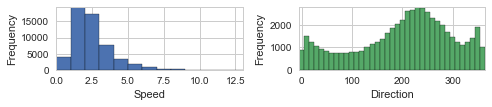

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat           lon             x             y         speed  \
count  5.552000e+04  5.552000e+04  55520.000000  55520.000000  55520.000000   
mean   4.700000e+01  2.370000e+02     -0.321844     -0.884809      2.487596   
std    3.119311e-11  1.956284e-10      1.807192      1.964791      1.350773   
min    4.700000e+01  2.370000e+02     -9.166093    -11.388456      0.010145   
25%    4.700000e+01  2.370000e+02     -1.597408     -1.977554      1.599009   
50%    4.700000e+01  2.370000e+02     -0.498411     -0.653762      2.178386   
75%    4.700000e+01  2.370000e+02      1.110799      0.476234      3.057293   
max    4.700000e+01  2.370000e+02      6.508003      4.706675     12.387152   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     202.258338  1.997567e+07    900.000000    188.846128  
std       95.811944  1.096640e+05    670.826435     86.670238  
min        0.002391  1.979010e+07      0.000000      0.002385  
25%      143.279492  1.988070e+07    450.000000    118.751850  
50%      217.561220  1.997567e+07    900.000000    199.535223  
75%      271.516374  2.007070e+07   1350.000000    251.826329  
max      359.992136  2.016123e+07   1800.000000    359.994014

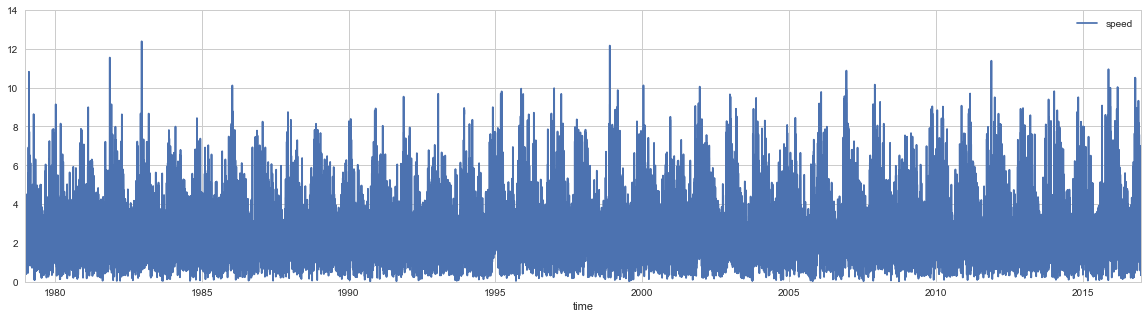

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [9]:
# df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


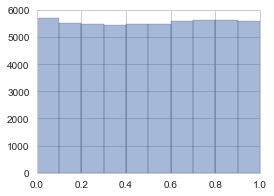

In [10]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [11]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

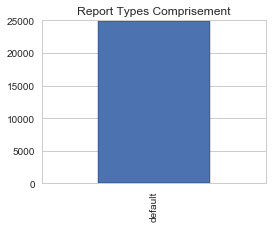

In [12]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

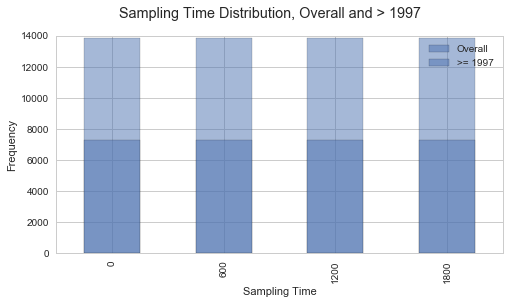

In [13]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [14]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [15]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  12.387152   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  12.166738   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  11.549906   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  11.387119   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  10.948269   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  10.877602   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  10.818074   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  10.514185   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  10.487196   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  10.155584   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  246.835090  19821216  1200  default   default   
1998-11-24 06:00:00  249.041844  19981124   600  default   default   
1981-11-14 18:00:00  250.625821  19811114  1800  default   default   
2011-11-22 12:00:00  253.506926  20111122  1200  default   default   
2015-11-17 18:00:00  230.964323  20151117  1800  default   default   
2006-12-15 06:00:00  244.513476  20061215   600  default   default   
1979-02-13 12:00:00  254.272090  19790213  1200  default   default   
2016-10-16 00:00:00  258.635193  20161016     0  default   default   
2016-10-14 18:00:00  257.134694  20161014  1800  default   default   
2007-12-03 12:00:00  250.866853  20071203  1200  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1982-12-16 12:00:00    203.164910  4.575802       5.597248  
1998-11-24 06:00:00    200.958156  4.464485       4.343008  
1981-11-14 18:00:00    199.374179  3.309410       3.852045  
2011-11-22 12:00:00    196.493074  3.792564       7.633285  
2015-11-17 18:00:00    219.035677  3.288520       1.574211  
2006-12-15 06:00:00    205.486524  2.668074       3.057258  
1979-02-13 12:00:00    195.727910  2.479248       4.581365  
2016-10-16 00:00:00    191.364807  5.549624       6.458054  
2016-10-14 18:00:00    192.865306  2.197611       3.317213  
2007-12-03 12:00:00    199.133147  4.017422       0.721097

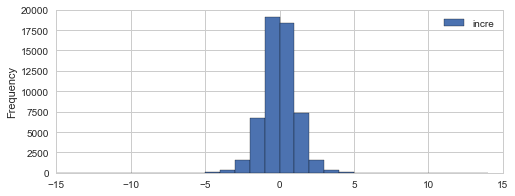

In [16]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [17]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  12.387152   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  12.166738   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  11.549906   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  11.387119   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  10.948269   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  10.877602   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  10.818074   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  10.514185   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  10.487196   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  10.155584   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  246.835090  19821216  1200  default   default   
1998-11-24 06:00:00  249.041844  19981124   600  default   default   
1981-11-14 18:00:00  250.625821  19811114  1800  default   default   
2011-11-22 12:00:00  253.506926  20111122  1200  default   default   
2015-11-17 18:00:00  230.964323  20151117  1800  default   default   
2006-12-15 06:00:00  244.513476  20061215   600  default   default   
1979-02-13 12:00:00  254.272090  19790213  1200  default   default   
2016-10-16 00:00:00  258.635193  20161016     0  default   default   
2016-10-14 18:00:00  257.134694  20161014  1800  default   default   
2007-12-03 12:00:00  250.866853  20071203  1200  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1982-12-16 12:00:00    203.164910  4.575802       5.597248  
1998-11-24 06:00:00    200.958156  4.464485       4.343008  
1981-11-14 18:00:00    199.374179  3.309410       3.852045  
2011-11-22 12:00:00    196.493074  3.792564       7.633285  
2015-11-17 18:00:00    219.035677  3.288520       1.574211  
2006-12-15 06:00:00    205.486524  2.668074       3.057258  
1979-02-13 12:00:00    195.727910  2.479248       4.581365  
2016-10-16 00:00:00    191.364807  5.549624       6.458054  
2016-10-14 18:00:00    192.865306  2.197611       3.317213  
2007-12-03 12:00:00    199.133147  4.017422       0.721097

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.002391      1
0.002977      1
0.003838      1
0.004358      1
0.014863      1
0.016250      1
0.040082      1
0.051632      1
0.071726      1
0.072316      1
0.073573      1
0.076523      1
0.087169      1
0.092352      1
0.096630      1
0.102869      1
0.105455      1
0.111509      1
0.118384      1
0.119396      1
0.120284      1
0.126174      1
0.126369      1
0.126540      1
0.142559      1
0.149077      1
0.152135      1
0.152149      1
0.162784      1
0.169671      1
             ..
359.875806    1
359.880552    1
359.880698    1
359.883659    1
359.891486    1
359.893570    1
359.896366    1
359.899408    1
359.912579    1
359.921823    1
359.922851    1
359.927531    1
359.936378    1
359.943001    1
359.949821    1
359.951458    1
359.952294    1
359.955081    1
359.963386    1
359.969465    1
359.970756    1
359.977020    1
359.980705    1
359.983227    1
359.984649    1
359.985311    1
359.986719    1
359.986844    1
359.988308    1
359.992136    1
Name: dir, dtype: int64

0 10


In [19]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [20]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0678188455396


Series([], Name: speed, dtype: int64)


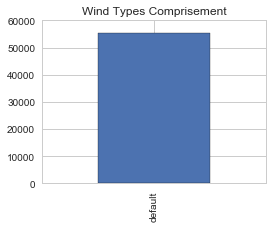

In [21]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [22]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


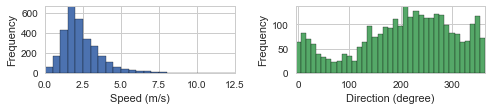

1981 - 1985


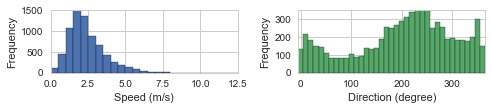

1986 - 1990


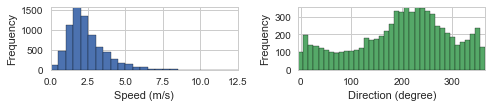

1991 - 1995


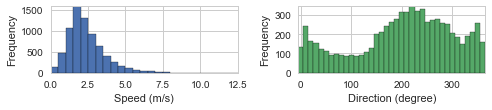

1996 - 2000


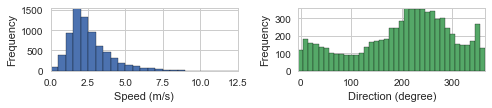

2001 - 2005


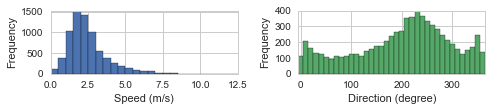

2006 - 2010


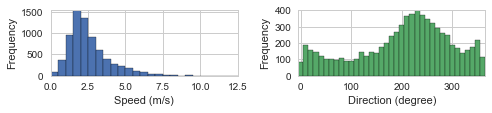

2011 - 2015


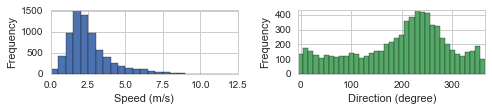

2016 - 2016


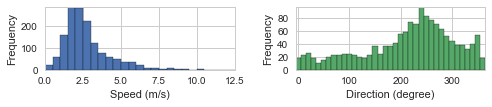

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 5.0)

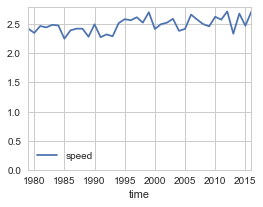

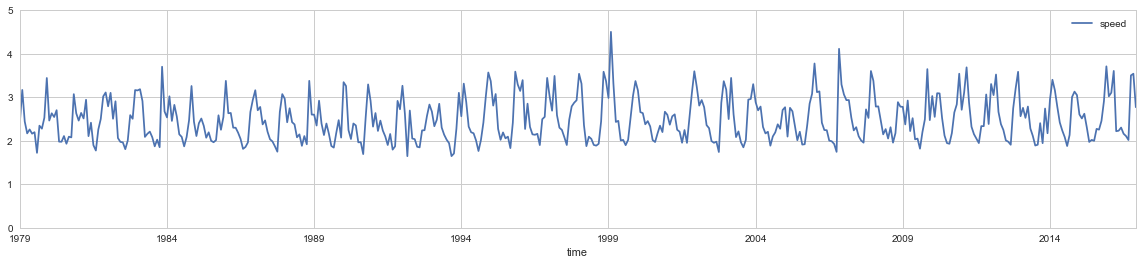

In [24]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [25]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANQAAAB6CAYAAADHyH2GAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEVdJREFUeJzt3XtQVPX7B/D3wroXWEAUlL4KBpSZURGiyNRXx8ysNJ28
hJcJG7tPRo5KlpOJyCiZWROZg5NNBCUVXyqxtHJiRrM0QfEHImmJrKwCArvL3nfZ/fz+IDbXs8uq
nL3B8/qPz3N29zln9+HsOfu5CBhjDIQQXgT5OgFCBhIqKEJ4RAVFCI+ooAjhERUUITyigiKER1RQ
foAxhmeffRYlJSX2NpVKhTVr1iAtLQ0PPPAAPvjgA9hsNntcq9Vi3bp1mDx5MiZPnoy1a9dCqVTa
4xaLBbm5uUhLS0NaWhq2bt0Kq9Xq1f0ajKigfMxqtSInJweHDx92aH/llVfQ0NCAnTt3YseOHfj5
55+xbds2e3zjxo04d+4cPvnkE+zevRvnzp3Dm2++aY9v374dv/76KwoLC/Hee+9h7969KCws9Np+
DVqM+IxcLmeLFi1i06ZNY6mpqay4uJgxxlhdXR0bO3YsO336tH3bkydPsrvuuovpdDrGGGMpKSms
oqLCHt+7dy9LTk5mjDFmNBrZvffeyw4ePGiPl5eXs/T0dGa1Wr2xa4MWnaF86OTJk0hISEB5eTnC
wsLs7XK5HBKJBOPHj7e3jRs3DhaLBXV1dQCAyMhIVFRUQKPRQKvVYt++fUhKSgIAnDlzBgaDAZMm
TbI/PjU1FR0dHZDL5V7au8FJ6OsEBrM5c+Zgzpw5nPbo6GgYjUZ0dnZi2LBhAACFQgEA6OzsBABs
2rQJ2dnZmDhxIgAgNjYWX3zxBQCgtbUVUqnUoUijo6MBAC0tLbj11ls9tk+DHZ2h/NA999yDMWPG
YMOGDVCr1VAqlcjPz4dQKITFYgEAnD9/HvHx8SgqKkJRURHCwsKQnZ0NxhgMBgPEYrHDc4pEIgCA
2Wz2+v4MJnSG8kMikQgFBQVYtWoV0tLSIJVKsWLFCpw+fRoymQxyuRx5eXk4cOAAxowZAwAoKCjA
9OnT8ccff0AikXAKp/dvqVTq9f0ZTKig/NQdd9yB77//Hh0dHZDJZLBardi6dStiY2NRV1cHiURi
LyYAGDVqFCIjI3Hx4kXcdttt0Ov10Gq1kMlkAIArV64AAEaOHOmT/Rks6CufH1Kr1ViyZAkUCgWG
Dx8OsViMyspKREdHIzExESNHjoRer0dzc7P9Me3t7VCpVIiLi8O4ceMglUpRXV1tj1dVVSEqKgpx
cXG+2KVBgwrKD0VERMBkMmHLli24cOECDh8+jNzcXKxYsQICgQDJyclISkpCdnY26urqUF9fj1Wr
ViEpKQmpqamQSCRYsGABcnNzUV1djd9//x3vvvsuMjMzfb1rA56AMe8OMLz6vyb5V1ZWFmbNmoWZ
M2cCANra2rB7926cPXsW4eHhmDVrFh5++GH79mq1GiUlJaitrQUA3H333XjqqacQHh4OoOeaqaio
CEePHsWQIUMwZcoULFq0CEFB9D/UnQkTJtz8g739w1dVVZW3X9Ipf8jDH3JgzD/y8IccGOt/HvTv
ihAeUUERwiMqKEJ4RAVFCI+ooAjhUUD3lLDZbA6D6q4VGRlJt4mJVwV0QSmVSnx+7H8IDZdxYrou
LZamzcfw4cN9kBkZrAK6oAAgNFyGsKHhvk6DEAB0DUUIr6igCOERFRQhPAroayjGGCxmCyxORqFa
zBYwWliEeFlAF5Rer4eiVY1wC/dE29Wphl6v90FWZDBzW1A2mw05OTn4888/IRKJkJeX5zBStNf6
9esRERGBNWvWeCRRV4KFQgiHDHHaToi3ub2GOnjwIMxmM7788kusXr0a+fn5nG1KS0tx9uxZjyRI
SCBxW1DV1dX473//CwBITk62zwvX68SJEzh16hQyMjI8kyEhAcTt96KrJ/oAgODgYHR3d0MoFKKt
rQ07duzAhx9+iP3791/3i/I1arelpQUqtQpWATemUatQW1trn5zEk3n0hz/kAPhHHv6QQ3+5LSiZ
TAadTmf/22azQfjP9cmBAwegVCrx/PPP48qVKzAajUhISMC8efP6fM5+DTG+ilwux3F9EyL+mQzy
asGsZ1i4q0lJqqurecvjZvlDDv6Shz/k0JtHf7gtqJSUFFRWVuKxxx5DTU0Nxo4da49lZmbaJ/4o
Ly/H+fPn3RYTIQOZ24KaMWMGjhw5gkWLFoExhs2bN6OiogJ6vd6vr5sYem6rX312dYjTb1TEA9wW
VFBQEHJzcx3aEhMTOdv525nJ2t2NqnoFWjUiTsxo1CNUYPRBVmSgG9A/1ojFUkhDQpwHTSrvJkMG
hQFbUMxmg6ZLDbWqkxMz6A0YKrY5eRQh/TNgC8qgM6DG8gcuSZo5MY1KjSkj7vRBVmSgG7AFBQAS
WQhCI8I47d3dFh9kQwYDGr5BCI+ooAjhERUUITwKiGsoV9OFKZVK0O+zxJ8EREG5mi5M0XgRZnDH
QhHiKwFRUIDz6cJCZDIYtCYfZUQIF11DEcIjKihCeEQFRQiPAuIaytV0Yd1W6vFA/EtAFJSr6cJa
2rogCpX6KCtCuAKioADn04UFCemWOfEvdA1FCI8C5gzFJwbAaDQ6HR4fEhICgcDJNEqEXIdBWVDW
7m6cbdMiqr7Vod1o1OOBlHiEhob6KDMS6AZlQTGbDRaTCWaz47wSJqMJNhuN5CU3b1AWlEFnwCVb
M4LaHL/aaVRqJCujERbGHZRIyPUYlAUFAOJQKWc0L43kJf1Fd/kI4REVFCE86vf6UPv27UNRURGC
g4MxduxY5OTkICiI6pQMTv1aH8poNOL999/HZ599htLSUmi1WlRWVno0YUL8Wb/WhxKJRCgtLYVU
2tOfrru7G2Kx2EOpEuL/+rU+VFBQEKKiogAAxcXF0Ov1uP/++92+6I0uGeJqHaiuLjWE4iEQd3Jn
h72eWOc1setZU4pv/rImkj/k4Q859Fe/1ofq/fudd95BY2MjCgoKrqvbzo2uA+RqHShdpxpCsRDD
nKwP5S6mN+k5sSCrDaNHj8bo0aOd5hEZGcnr9aE/rYnk6zz8IYfePPqjX+tDAcBbb70FkUiEjz76
KOBvRhh0euxrOIgYzS2cmK5Li6Vp8zF8+HAfZEYCRb/Wh0pKSkJZWRlSU1OxbNkyAD2LsM2YMcPj
iXtKSFgoZzIYQq5Xv9eHamho4D8rH2EALJZuzshgALCYLbRIG3Fr0HY9csbabUVLhwYCCXdYR1en
Gnq93gdZkUBCBXUNYTB3ZDDQM2KYEHcC+y4CIX6GCooQHlFBEcIjKihCeEQFRQiP/ObWFWPM5W1p
vV4PX/8CxP7Jw9lMSQDNlkR6+E1B6fV6/HqiERJJCCcmb7oIm9Xqg6z+1W02o/JYPUZd5BaUyWTA
I1PvpbkoiP8UlM1mg8loctof0GwygwX59hxl0BlwxlKLDm0HJ6ZRqZGmjKOCIv5TUEqlEkeaKxE2
NIITu9Qmh2yY7/vXSWQhnIldAJrchfzLbwoKAKQuPrCSUO7XQEL8Ed3lI4RHVFCE8MivvvIFKpvN
BoVC4TQ2atQoBAcHezkj4itUUDzQqjUorvoBI5odR/pqVWpkzVyKuLg4H2VGvI0Kiiey8HBEDOfO
X0EGF7qGIoRHdIbyIHfdlWhI/cBDBeVB1u5uVNUr0KoRcWJGox6hAqOTR5FA5pOC6ujgdt9RKpUY
iP+wxWIppCHcH6YZYzCoL1Nn2wHGJwX19al9nDZFkwLdQokPsvEcZrNB06WGWsWdvVbZ2YlLLWqI
hrZyYrQ0aeDySUFpLNx7IRpDN0Shvu1RzjeDzoAayx+4JGnmxJTt7fiP5VaXZy9XZy6Azl7+zCcF
5WxWoSAht20

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFZtJREFUeJztnXtwk1X6xz9N0zZp0pZSLj91KUpRvCACosUZF3ZxERcv
O7OwtuDU2Vl3R3dH0WG3UxArLJQFnBVnlnWY6ugs0+osDLKueFlEYRbFRaRQlZsoakvLpbfckyZp
cn5/hL5N0ktqmyZvkvOZ6UzO++a8eU6a73suz/M+J00IIZBIJDFFE28DJJJURApPIokDUngSSRyQ
wpNI4oAUnkQSB6TwJJI4IIWXYAgh+O1vf0ttba1yzGw286c//Yni4mLuvPNO/va3v+H3+5Xzdrud
p59+mtmzZzN79mwqKiowmUzKea/Xy9q1aykuLqa4uJjnnnsOn88X03alGlJ4CYTP52PNmjV89NFH
IcefeOIJTp8+zdatW3nxxRfZu3cvf/3rX5Xzf/7zn/n666959dVXeeWVV/j666955plnlPObN2/m
448/prq6mhdeeIG33nqL6urqmLUrJRGShKCxsVGUlpaKn/70p2LWrFmipqZGCCHE8ePHxXXXXSdO
nDihvPfYsWPipptuEg6HQwghxMyZM8Xu3buV82+99ZaYPn26EEKIzs5Occstt4gPPvhAOb9r1y5x
xx13CJ/PF4umpSSyx0sQjh07xqRJk9i1axc5OTnK8cbGRnQ6HTfeeKNy7Prrr8fr9XL8+HEA8vPz
2b17NzabDbvdzttvv83UqVMBOHXqFC6Xi9tvv12pP2vWLNrb22lsbIxR61IPbbwNkAyOBx54gAce
eKDX8bFjx9LZ2UlHRwejR48GoLm5GYCOjg4A1q1bR3l5ObfddhsAEyZM4PXXXwfg0qVL6PX6EDGP
HTsWgIsXL3L11VePWJtSGdnjJTjTpk1j4sSJrF69GovFgslkYuPGjWi1WrxeLwDffvst11xzDdu2
bWPbtm3k5ORQXl6OEAKXy0VWVlbINTMzMwHweDwxb0+qIHu8BCczM5MtW7awfPlyiouL0ev1PP74
45w4cQKj0UhjYyNVVVX85z//YeLEiQBs2bKFu+66i8OHD6PT6XoJrLus1+tj3p5UQQovCZgyZQrv
vPMO7e3tGI1GfD4fzz33HBMmTOD48ePodDpFdABXXXUV+fn5nDt3jsmTJ+N0OrHb7RiNRgBaW1sB
GD9+fFzakwrIoWaCY7FYWLp0Kc3NzRQUFJCVlcX+/fsZO3YsRUVFjB8/HqfTSVNTk1Knra0Ns9lM
YWEh119/PXq9nrq6OuX8kSNHGDNmDIWFhfFoUkoQUXh+v59nn32WkpISysrKaGhoCDm/b98+Fi1a
RElJCTt27BiwTnt7O7///e956KGHKC0tlatmUSAvLw+3282GDRv4/vvv+eijj1i7di2PP/44aWlp
TJ8+nalTp1JeXs7x48c5efIky5cvZ+rUqcyaNQudTsfixYtZu3YtdXV1/O9//+P555/n4YcfjnfT
kpo0IQZ+EPb9999n3759bNy4kfr6eqqrq9m6dSsQiHhYuHAhO3fuRK/Xs2TJEqqrqzl69GifdVas
WMGcOXNYuHAhhw4dorOzk5/85Cf9fnbwXVjSw7Jly7j33ntZsGABAC0tLbzyyiucOXOG3Nxc7r33
Xu6++27l/RaLhdraWr788ksAbr75ZsrKysjNzQUCc7pt27Zx6NAhMjIymDNnDqWlpWg0ckAUiVtv
vXVI9SLO8erq6vjxj38MwPTp0xXfEMDZs2cpLCwkLy9PMeKzzz6jvr6+zzpHjx5lypQp/PrXv+aq
q65i1apVEQ0casNiSV1dXUztPHjwYK9jP//5zwesM2/evAHtvOOOO6JiWzSI9fc5VIbTMUQUXvCk
GyA9PZ2uri60Wi12uz3E/2MwGLDb7f3WaW5uJjc3l3/84x/8/e9/5+WXX+bJJ58c8PMTpdeTdkaX
RLFzqEQUntFoxOFwKGW/349Wq+3znMPhICcnp986o0aNYt68eUDgDvzCCy9ENDBR7nzSzuiRSHYO
lYiD+JkzZ3LgwAEA6uvrue6665RzRUVFNDQ0YDab8Xg8HDlyhBkzZvRb59Zbb+W///0vAJ999hmT
J08esuESSSITscebP38+Bw8epLS0FCEEf/nLX9i9ezdOp5OSkhJWrFjBI488ghCCRYsWMX78+D7r
AFRUVPDMM8/wz3/+E6PRyPPPPz/iDZRI1EjEVc14kkhDDmln9EgFO+V6sUQSB6TwJJI4IIUnkcQB
KTyJJA5I4UkkcUAKTyKJA/J5PEm/CCFwOp0hx7Kzs0lLS4uTRcmDFJ5EIVxoDoeDo6db0OuzAejs
dHLnzGswGAzxMjFpkMKTKDidTj4++h06XUBoZlMbumwj+uzsOFuWfEjhSULQ6bIVoblcoYITQoQE
v4Mceg4VKTxJv/j9fhw2K5rLujJ1dGA2d5CfXwDIoedwkMJLUfpaOHE4HASH7tptVg5f+phRnoDQ
TG1tzL5yrhx6RgEpvBQlfD4HPXO67KAeTG80YMgLPOzc2emKuZ3JihReChM8n4PeczrJyCEd6BJJ
HJA9nkQhfDHFZrUgNKp9XDOhkcJLEbr3Seh2B4QvpEDvxZTzLY0YR+fG3NZUQAovRbDb7Rz6ooEO
V2A/BIulgzHjrghZSIHQxRSdYeA5n/TrDR0pvBTBZDLxjfcUnXbn5XIbs/VzKSgYM+Rrdna6OPSF
mby8/Mtl6dcbLDFN4d7N7t27KSkpiWIzJINBZ8jGkJeDIS8HvTE64sjS6dFnB1ZHg10TasLv99Pe
3h7yF7xHfDyI2ON98MEHeDwetm/fTn19PRs3bgxJ4b5hw4aQFO7z5s3j6NGj/dY5efIkO3fu7DW/
kCQe4YsxTqcTmy1UfGoYeppMJl779A0MuYEkyw6rnYeKF1FQUBA3m2Kawt1kMrF582aefvppKisr
B2VgomQUVrudFy9eBHp2ibVYzDSaGvB29dz5m5u+x6I1gzYdAKvVgjYrg6x+6jQ3fc/X7pPk5I8K
vL/DxMmT1zP+/64EwN3pYvKV+l777Ol0uohijOb3aTabsTvtiMu/dofTTn19PaNGjYraZ/xQYpbC
3ePxsGrVKlauXNlrB9KBSPY0byNFeEiYwWBg74XPle2a/W4P+ZpRjB0zWnmPy27BounZ0tnRYUGb
pVXKwttFYe5EJl49CQCtBqwOE6PHBbZubtfpmJx7rXK+rbWFSx2t5NIjPLfbxT1zp4T8bsKJ9vfZ
3t7O96cukTMqsEJry7Yy/Ybpw+7xRnTvhGilcD99+jQNDQ2sWbMGt9vNN998w/r16we1cYnkhxMe
EtbYcA6/z6ecdzlc1HsPc17Xs29etN0HdpuV+o7PGJXW8wO3mS0UmwoHFF4qEFF4M2fOZP/+/Sxc
uHDAFO7Z2dkcOXKERx55hLS0tF51pk2bxjvvvANAU1MTy5cvH5To2tvbQ8r5+fly+6hBEhwSlpXV
e1tlnTFbcR1AZPfBUAh2TwB0dXmj/hmJSExTuA+FN0/tUV6rYVKsVvx+PyaTSSnbbDZMpnY8ns5A
2WoZ9oKW8PuxWS1YzB091wyKbIl0Pl4IIfB6vHgv7+3u9XjjvrgXUXgajYa1a9eGHCsqKlJez5s3
T9kBaKA6wfzoRz9SXA+R6B6XS0IJF1pHRwfvntmH8XLv0vzdOTocXsZc3sf8fEsj/mF6bcOHp+FD
00jn44XT6aT5koVcb2CkZO2w9HokKtZIB3qCEr5E3nLuAro8A7psHQCZ+iz0ZIREoTjdw/+xBQ9P
+xqaRjofTvgNpPtYtEnXatFmZCiv4038LZAMGUOuURkRmFpNXGi10pUecIxfbLGSaeg9r1MbffnY
bsoqilBrYML

Wall time: 23.6 s


In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGJ1JREFUeJzt3W1sW/XB/vGv8+CQ2k6zoFVC6zI1Xa21qkKblAJaGugL
Fphgq1AxtZE3BkX3oq5dApSUPiSgUkrEYnVhCqWsE5pDErIVqQzQJtFVCX1QhgwtammH5j8KpKW0
Tbtim+ahzvm/4K6HF+7Ex3Vih16fV/XPPx9fx4HLx+f4+FgMwzAQEZGEZaU7gIjIVKPiFBExScUp
ImKSilNExCQVp4iISSpOERGTEirOw4cP4/V6ATh27Bgejwev18uDDz7I2bNnAejs7OTuu+/G5XKx
d+9eAAYGBli9ejUej4eHHnqIc+fOAXDo0CHuueceVqxYwe9+97uJWC8RkYljjGPHjh3GnXfeadxz
zz2GYRjGfffdZ3zwwQeGYRhGe3u78fTTTxunT5827rzzTmNwcND4/PPPY//+wx/+YDQ3NxuGYRiv
v/66sXnzZsMwDOMnP/mJ0dvba4yMjBgrV640jh49Ol4MEZGMMe4WZ3FxMc8991zsts/nY+7cuQBE
o1Hy8vJ4//33WbhwIVarFYfDQXFxMcePHycQCLBkyRIAKisrOXjwIOFwmKGhIYqLi7FYLFRUVHDg
wIEJelsQEUm9nPEmVFVV0dfXF7s9Y8YMAN59911aW1t5+eWXefvtt3E4HLE5NpuNcDhMOByOjdts
NkKhEOFwGLvdHjf3k08+GTdoIBBIfK1EREwoLy83NX/c4vw6b775Js8//zw7duygqKgIu91OJBKJ
3R+JRHA4HHHjkUiEgoKCr51bUFCQ0POaXbnJFAgElO8KKN+VyeR8mZwNktsoM12cu3fv5pVXXsHv
91NYWAhAaWkp27ZtY3BwkKGhIYLBIE6nk7KyMrq6uigtLaW7u5vy8nLsdju5ubl8/PHHfPe732Xf
vn386le/Mh18MkSjUYLBYMJzReTqYKo4o9EoW7Zs4brrrmP16tUA3HDDDaxZswav14vH48EwDGpr
a8nLy8PtdlNXV4fb7SY3N5empiYAnnzySR599FGi0SgVFRVcf/31qV+zFAgGg3gfb2Pa9Bljzvvi
wmnq7itl8eLFk5RMRNIpoeKcOXMmnZ2dAPzjH//42jkulwuXyxU3lp+fT3Nz86i5CxYsiC0v002b
PgP7t76T7hgikkH0BXgREZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThER
k1ScIiImqThFRExScYqImKTiFBExScUpImKSilNExCQVp4iISSpOERGTkrpYm8QzRkY4efIkH374
4bhzZ8+eTXZ29iSkEpGJouJMgYuhM/j3Wtj17ltjzvviwmn8Wz04nc5JSiYiEyGh4jx8+DC/+c1v
8Pv99Pb2sm7dOiwWC3PmzKGhoYGsrCw6Ozvp6OggJyeH6upqli5dysDAAGvXrqW/vx+bzUZjYyNF
RUUcOnSILVu2kJ2dTUVFRcZe5dIMXZtI5Oox7j7OF198kY0bNzI4OAjA1q1bqampoa2tDcMw2LNn
D2fOnMHv99PR0cHOnTvx+XwMDQ3R3t6O0+mkra2NZcuW0dLSAkBDQwNNTU20t7dz+PBhPvjgg4ld
SxGRFBq3OIuLi3nuuedit48ePRq7DG5lZSUHDhzg/fffZ+HChVitVhwOB8XFxRw/fpxAIMCSJUti
cw8ePEg4HGZoaIji4mIsFgsVFRUcOHBgglZPRCT1xv2oXlVVRV9fX+y2YRhYLBYAbDYboVCIcDiM
w+GIzbHZbITD4bjxr8612+1xcz/55JOEwgYCgcTWKkV6e3tTvswjR44QCoVSvtxETPbrZ5byXZlM
zpfJ2ZJh+uBQVtZ/NlIjkQgFBQXY7XYikUjcuMPhiBsfa25BQUFCz11eXm427hVxOBzw+qmULnP+
/PlpOTgUCAQm/fUzQ/muTCbny+RskFypm/4e57x58+jp6QGgu7ubRYsWUVpaSiAQYHBwkFAoRDAY
xOl0UlZWRldXV2xueXk5drud3NxcPv74YwzDYN++fSxatMh0cBGRdDG9xVlXV8emTZvw+XyUlJRQ
VVVFdnY2Xq8Xj8eDYRjU1taSl5eH2+2mrq4Ot9tNbm4uTU1NADz55JM8+uijRKNRKioquP7661O+
YiIiEyWh4pw5cyadnZ0AzJo1i9bW1lFzXC4XLpcrbiw/P5/m5uZRcxcsWBBbnojIVKNTLkVETFJx
ioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopT
RMQkFaeIiEkqThERk1ScIiImqThFRExScYqImKTiFBExScUpImKS6atcAgwPD7Nu3TpOnDhBVlYW
mzdvJicnh3Xr1mGxWJgzZw4NDQ1kZWXR2dlJR0cHOTk5VFdXs3TpUgYGBli7di39/f3YbDYaGxsp
KipK9bqJiEyIpLY4u7q6uHTpEh0dHaxatYpt27axdetWampqaGtrwzAM9uzZw5kzZ/D7/XR0dLBz
5058Ph9DQ0O0t7fjdDppa2tj2bJltLS0pHq9REQmTFJbnLNmzSIajTIyMkI4HCYnJ4dDhw6xePFi
ACorK9m/fz9ZWVksXLgQq9WK1WqluLiY48ePEwgEWLlyZWxuosUZCASSiZu03t7elC/zyJEjhEKh
lC83EZP9+pmlfFcmk/NlcrZkJFWc06ZN48SJE9xxxx2cP3+e7du3884772CxWACw2WyEQiHC4TAO
hyP2OJvNRjgcjhu/PDcR5eXlycRNmsPhgNdPpXSZ8+fPx+l0pnSZiQgEApP++pmhfFcmk/NlcjZI
rtSTKs6XXnqJiooKHnnkET799FN+/vOfMzw8HLs/EolQUFCA3W4nEonEjTscjrjxy3MnUzQaJRgM
jjvvo48+moQ0IjLVJFWcBQUF5ObmAjB9+nQuXbrEvHnz6Onp4cYbb6S7u5ubbrqJ0tJStm3bxuDg
IENDQwSDQZxOJ2VlZXR1dVFaWkp3d/ekvxsFg0G8j7cxbfqMMef19x3j2plzJymViEwVSRXn/fff
z/r16/F4PAwPD1NbW8v8+fPZtGkTPp+PkpISqqqqyM7Oxuv14vF4MAyD2tpa8vLycLvd1NXV4Xa7
yc3NpampKdXrNa5p02dg/9Z3xpzzxYXPJimNiEwlSRWnzWbjt7/97ajx1tbWUWMulwuXyxU3lp+f
T3NzczJPLSKSdvoCvIiISSpOERGTVJwiIiapOEVETFJxioiYpOIUETEpqa8jSXKMkZGEz0aaPXs2
2dnZE5xIRJKh4pxEF0NnqN9xlmnTxz7d84sLp/Fv9aTlnHYRGZ+Kc5IlcsaSiGQ27eMUETFJxSki
YpKKU0TEJBWniIhJKk4REZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJiUtKnXL7wwgv8/e9/Z3h4
GLfbzeLFi1m3bh0Wi4U5c+bQ0NBAVlYWnZ2ddHR0kJOTQ3V1NUuXLmVgYIC1a9fS39+PzWajsbGR
oqKiVK6XiMiESWqLs6enh/fee4/29nb8fj+nTp1i69at1NTU0NbWhmEY7NmzhzNnzuD3++no6GDn
zp34fD6GhoZob2/H6XTS1tbGsmXLaGlpSfV6iYhMmKS2OPft24fT6WTVqlWEw2Eee+wxOjs7Wbx4
MQCVlZXs37+frKwsFi5ciNVqxWq1UlxczPHjxwkEAqxcuTI2N9HiDAQCycQdpbe3NyXLmUhHjhwh
FAqldJmpev0mivJdmUzOl8nZkpFUcZ4/f56TJ0+yfft2+vr6qK6uxjAMLBYL8OXlg0OhEOFwGIfD
EXuczWYjHA7

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGFxJREFUeJzt3XtsU+f9x/G3c3EabAfKUCX0Y6GEYjGIIgIINjHSIhWC
qjIoAms2MlIDCLIOGjogEO4KoosYbAsivYn9Ey5pRKYKjU1tQZRIQPnDW4kSmqFZWSQua7msxXbB
geT8/ugP75clJCfBtySf11/w+JjzPU+cD8/xeZ5zLIZhGIiISI9SEl2AiMhAoLAUETFBYSkiYoLC
UkTEBIWliIgJCksRERPSetugvb2dbdu20dLSgsViYffu3WRkZLB582YsFgsTJkxg586dpKSkUFtb
S01NDWlpaRQXFzNnzhwePHjAxo0buXPnDjabjYqKCkaOHBmPYxMRiZpeR5Znz54FoKamhpKSEn77
29/y9ttvU1JSwrFjxzAMgzNnznDr1i2qq6upqanh8OHDHDhwgLa2No4fP47T6eTYsWMsWrSIqqqq
mB+UiEi09TqyfPnll3nppZcAuHHjBllZWVy4cIEZM2YAUFBQwPnz50lJSSE/Px+r1YrVaiU7O5vm
5mZ8Ph8rV66MbKuwFJGBqNewBEhLS6O0tJRPP/2UyspKzp8/j8ViAcBmsxEIBAgGgzgcjsh7bDYb
wWCwU/vjbXvj8/n6cywiIr2aNm1av95nKiwBKioq2LBhAy6Xi3A4HGkPhUJkZWVht9sJhUKd2h0O
R6f2x9ua0d8Dijafz5cUtSRLHaBankS1dC/ZaumvXr+z/Oijj3jvvfcAyMzMxGKxkJuby6VLlwCo
r69n+vTp5OXl4fP5CIfDBAIB/H4/TqeTqVOncu7cuci2ydJpIiJ90evIct68eWzZsoVly5bx6NEj
ysrKGD9+PNu3b+fAgQPk5ORQWFhIamoqXq8Xj8eDYRisX7+ejIwM3G43paWluN1u0tPT2b9/fzyO
S0QkqnoNy2HDhvH73/++S/uRI0e6tLlcLlwuV6e2zMxMKisrn6JEEZHE06R0ERETFJYiIiYoLEVE
TDA9dUhkKGhvb8fv9z/x9fHjx5OamhrHiiRZKCxF/h+/3493yzGGDX+uy2vfffs11W97cDqdCahM
Ek1hKUNOT6PHlpYWhg1/Dvuz/xPnqiTZKSxlyOlp9Hjn2pf8YMyPElCVJDuFpQxJTxo9fvftVwmo
RgYCXQ0XETFBI0sRk4yODlpaWp74ent7exyrkXhTWIqYdD9wix3v32bY8K4Xh7779mtKl+VF7vMq
g4/CUqQPdKV86NJ3liIiJigsRURM0Gm4DEq9TTwX6SuFpQxKmngu0aawlEFLE88lmvSdpYiICQpL
ERETejwNf/jwIWVlZVy/fp22tjaKi4sZPXo0q1ev5vnnnwfA7XbzyiuvUFtbS01NDWlpaRQXFzNn
zhwePHjAxo0buXPnDjabjYqKCkaOHBmP4xIRiaoew/LkyZOMGDGCffv28c0337Bo0SLeeOMNXn/9
dYqKiiLb3bp1i+rqaurq6giHw3g8HmbNmsXx48dxOp2sXbuWU6dOUVVVxbZt22J+UCIi0dbjafj8
+fN58803ATAMg9TUVBobG/nss89YtmwZZWVlBINBGhoayM/Px2q14nA4yM7Oprm5GZ/Px+zZswEo
KCjg4sWLsT8iEZEY6HFkabPZAAgGg6xbt46SkhLa2tpYunQpubm5vPPOOxw6dIiJEyficDg6vS8Y
DBIMBiPtNpuNQCBgujCfz9ef44mJZKklWeqA5K+ltbU1AZUkf78kSjLV0l+9Th26efMmb7zxBh6P
hwULFnDv3j2ysrIAmDt3LuXl5UyfPp1QKBR5TygUwuFwYLfbI+2hUCjyPjOmTZvW12OJCZ/PlxS1
JEsdMDBqcTgc8Kd/xb2eZO+XREi2Wvqrx9Pw27dvU1RUxMaNG1myZAkAK1asoKGhAYCLFy8yefJk
8vLy8Pl8hMNhAoEAfr8fp9PJ1KlTOXfuHAD19fVJ02EiIn3V48jy3Xff5d69e1RVVVFVVQXA5s2b
2bt3L+np6YwaNYry8nLsdjterxePx4NhGKxfv56MjAzcbjelpaW43W7S09PZv39/XA5KRCTaegzL
bdu2dXv1uqampkuby+XC5XJ1asvMzKSysvIpSxQRSTwtd5QBq729ndbW1k4XFx/TzTIk2hSWMmD5
/X4qjjYwbHjXCzm6WYZEm8JSBrRkuVmG0dHBjRs3uHr1arevjx8/ntTU1LjWJNGlsBSJgvuBW1Sf
tVD319NdXvvu26+pftuD0+lMQGUSLQpLkSjR83kGN911SETEBIWliIgJCksRERP0naVIjBkdHT3O
+9SV8oFBYSkSY/cDt9jx/m2GDe/6tEldKR84FJYicfCkK+UadQ4cCkuRBNKoc+BQWEpSa29vx+/v
GiQweNZ/a37mwKCwlKTm9/vxbjnGsOHPdXlN678lnhSWkvSSZf23DG2aZykiYoLCUkTEBIWliIgJ
CksRERN0gUdEYqanR3/AwJp032NYPnz4kLKyMq5fv05bWxvFxcW88MILbN68GYvFwoQJE9i5cycp
KSnU1tZSU1NDWloaxcXFzJkzhwcPHrBx40bu3LmDzWajoqKCkSNHxuvYRCTBenr0x0CbdN9jWJ48
eZIRI0awb98+vvnmGxYtWsTEiRMpKSlh5syZ7NixgzNnzjBlyhSqq6upq6sjHA7j8XiYNWsWx48f
x+l0snbtWk6dOkVVVVW3T4sUkcFrsEy67zEs58+fT2FhIQCGYZCamkpTUxMzZswAoKCggPPnz5OS
kkJ+fj5WqxWr1Up2djbNzc34fD5WrlwZ2fbxs8fN8Pl8/T2mqEuWWpKlDohfLa2trXHZT7JqbGwk
EAj0673J8Hnp7ef3NMcXbz2Gpc1mAyAYDLJu3TpKSkqoqKjAYrFEXg8EAgSDwU7fSdhsNoLBYKf2
x9uaNW3atD4fTCz4fL6kqCVZ6oD41uJwOOBPXU/hhorc3Nx+naYmy+elt59ff4+vv57mP5Ber4bf
vHmT5cuXs3DhQhYsWEBKyn/eEgqFyMrKwm63EwqFOrU7HI5O7Y+3FREZiHocWd6+fZuioiJ27NjB
T37yEwAmTZrEpUuXmDlzJvX19fz4xz8mLy+P3/3ud4TDYdra2vD7/TidTqZOncq5c+fIy8ujvr4+
Kf6nk+QzFG6WIQNfj2H57rvvcu/ePaqqqiLfN27dupU9e/Zw4MABcnJyKCwsJDU1Fa/Xi8fjwTAM
1q9fT0ZGBm63m9LSUtxuN+np6ezfvz8uByUDi26WIQNBj2G5bdu2bq9eHzlypEuby+XC5XJ1asvM
zKSysvIpS5ShQDfLkGSnFTwiIiYoLEVETFBYioiYoLAUETFBYSkiYoLuOiSSpPSY3OSisBRJUnpM
bnJRWEpcaJVO/wyWO/YMBgpLiQut0pGBTmEpcaNVOjKQ6Wq4iIgJCksREROS9jT86tWr3bZruoSI
JELShuXqX5/u0qbpEiKSKEkblpouITIwDJVpYUkbliLyZL2t7mlvb49bLUNlWpjCUmQA6m11T+my
vMhTWONhKEwLU1iKDFBa3RNfmjokImKCqbC8fPkyXq8XgCtXrjB79my8Xi9er5c///nPANTW1rJ4
8WJcLhdnz54F4MGDB6xduxaPx8OqVau4e/dujA5DRCS2ej0N/+CDDzh58iSZmZkANDU18frrr1NU
VBTZ5tatW1RXV1NXV0c4HMbj8TBr1iyOHz+O0+lk7dq1nDp1iqqqqm4fgCaDw1C5KipDU69hmZ2d
zcGDB9m0aRMAjY2NtLS0cObMGcaOHUtZWRkNDQ3k5+djtVqxWq1kZ2fT3NyMz+dj5cqVABQUFEQe
p/s0GhsbCQQ

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [27]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [28]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [29]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [30]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [31]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('Speed redistribution info:', speed_redistribution_info )
print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Speed redistribution info: None
55520


In [32]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.424413     -0.955729      2.562621   
std    4.703954e-12  9.172000e-11      1.802065      2.067680      1.431391   
min    4.700000e+01  2.370000e+02     -9.166093    -10.918585      0.010145   
25%    4.700000e+01  2.370000e+02     -1.656267     -2.149330      1.633600   
50%    4.700000e+01  2.370000e+02     -0.585217     -0.742086      2.216330   
75%    4.700000e+01  2.370000e+02      0.983090      0.491738      3.116656   
max    4.700000e+01  2.370000e+02      6.275871      4.432800     11.387119   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     200.814362  2.010567e+07    900.000000    190.187829  
std       93.742468  2.872210e+04    670.843355     86.668069  
min        0.002977  2.006010e+07      0.000000      0.002385  
25%      141.233901  2.008070e+07    450.000000    125.253343  
50%      218.459009  2.010567e+07    900.000000    201.846276  
75%      266.495076  2.013070e+07   1350.000000    249.810863  
max      359.992136  2.015123e+07   1800.000000    359.994014

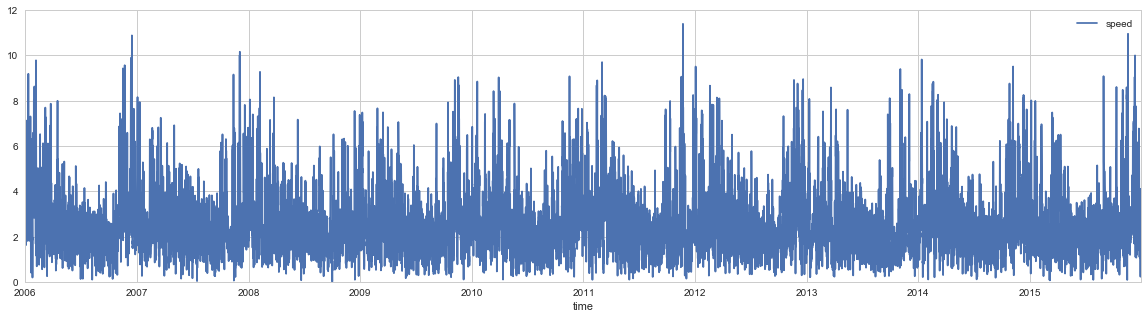

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

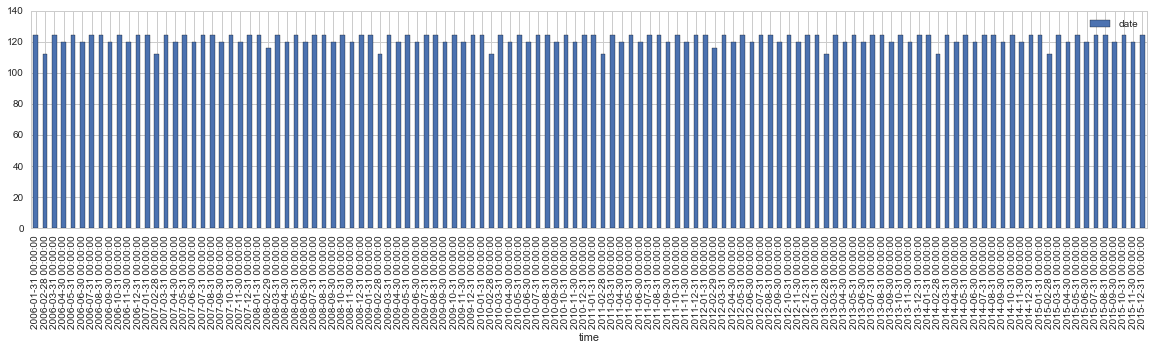

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


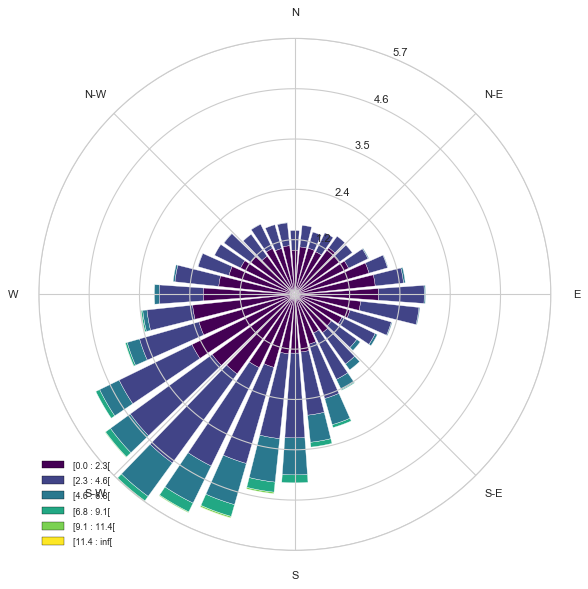

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EXMyOyC26kJu64ZSLgLmoSaZpabpCGea1r
lrfSzPC6YJfrgrtlLlnea2Gm16UUM1xLStMAw9xNMXNHQYQZBISZ3x/G/CRlAJ3hzAyf5+PBI4Zz
5ns+YLw553u+5/t1MBgMBoQQwoxUShcghLA/EixCCLOTYBFCmJ0EixDC7CRYhBBmJ8EihDA7jdIF
lFZSUpLSJQhRYQUEBJRpf5sJFij7N2dpSUlJVlcTWGddUlPpWGtNZSWXQkIIs5NgEUKYnQSLEMLs
JFiEEGYnwSKEMDsJFiGE2UmwCCHMToJFCAW9/PLL/PrrrwDk5eXxyiuv8Omnnxq3h4eHc+LEifve
Fx8fz7p167h48SJDhgwp9fE6d+5sbPfs2bOPWH3xbGqAXHnR6/XcvHmzVPsJ8Sg6d+5MYmIiTz75
JElJSTz55JPs3buXV199ldzcXC5dukSzZs3ue1/Xrl0BuHjxYnmXXCoSLA9w8+ZNPtuSiKubR7H7
6LSZtPaRH589mTBhAuvXrzdrm4MHD2bu3LnFbu/UqRNLly5l5MiR7N27l6eeeorNmzeTlZXFsWPH
aNeuHQkJCSxcuBC1Wk3dunWJiooiNjaWlJQUwsLCSE9PZ/To0aSlpdG9e3fGjBnDxIkT6d27N127
diU+Pp5t27YRHR1t1u/NFPnNKIarmwfuHl4l7JVdLrUI+9WiRQtSUlIwGAwkJCQwYcIEUlNT2b9/
P6dOnaJLly5MnTqVNWvWUK1aNRYtWsRXX32FRvP/v7rZ2dnMnTsXFxcXhg0bRnBwsILf0V0SLEL8
ae7cuSbPLixBpVLRrFkz4uPjqVGjBpUqVaJr1658//33nDx5kmHDhjF16lTGjh0LQE5ODp06daJe
vXrGNpo1a4a7uzsArVq14ty5c0WOocS01tJ5K4TCOnfuzMcff0xQUBBw92Hb48ePo9fr8fLy4rHH
HmPp0qXExMQwevRoOnToUOT9Z8+eRafTkZ+fz6+//kqTJk1wdHTk+vXrABw/frzcvyeLBYterycy
MpLQ0FDCw8M5f/78A/ebOnUq8+bNs1QZQli9Tp06kZSURLdu3QBwdHTE3d2ddu3aoVKpmDx5MqNG
jSIsLIw1a9bg6+tb5P1VqlRh3LhxhIWF0bNnTxo3bszgwYNZtWoVI0aM4Nq1a+X+PVnsUmjXrl3k
5eWxbt06kpOTiY6OZtmyZUX2Wbt2LadPn6Zt27aWKkMIq1enTh1OnToFYAyBpUuXGrd36dKFLl26
FHnPgAEDjJ9v2bLlvjZbtWpFbGzsfV/ft28fADExMY9euAkWO2NJSkoyntr5+flx9OjRItsPHTrE
4cOHCQ0NtVQJQgiFWOyMRavV4ubmZnytVqvJz89Ho9GQmprKkiVL+Oijj/j2229L3WZ5zSKXkZHB
1auZZGlvF7uPTnuLxlU9rHZmO2usS2oqHWusqawsFixubm7odDrja71eb7xFFhcXx82bNxk1ahTX
r18nJyeHhg0bFjm9e5DymlkrLS2NM+mnTd5uzsp0BrKtbrYvsN5ZyKSmkllrTWVlsWDx9/fnu+++
o3fv3iQnJxfpcBo+fDjDhw8HYNOmTaSkpJQYKkII22GxYAkJCWHfvn2EhYVhMBiYOXMmsbGxZGdn
S7+KEHbOYsGiUqmIiooq8rVGjRrdt5+cqQhrUdpnxMrCy8sLlariDReTkbdC/Kk0z4iVhU6bycv9
AqlWrVqx+xw8eJCxY8fSuHFjDAYDGRkZvPHGG/Tu3fuB+1++fJmTJ0/So0cPs9RoKRIsQtyjdM+I
mVeHDh1YuHAhcHecyfz582nQoAHNmze/b98DBw6QkpIiwWKv9Ho9t27dIi0trcR9K+rpsCg7Jycn
QkND2bZtG6tXr+bq1aukpqbSo0cP3nrrLVasWEFOTg5t2rTB3d2djz76CIPBgE6nMwaSNZBgeUjZ
uix+uJDO9YLTJvcrzemwEPeqVq0aO3bsoFevXgwePJjc3Fy6du3KuHHjGDVqFCkpKQQHB/PFF18w
d+5cvL29Wb58OXFxcbz++utKlw9IsDwSZxe3cj9tFvbv8uXLtGnThiNHjnDgwAHc3NzIy8u7bz9v
b29mzJiBi4sL165dw9/fX4FqH0zOz4WwItnZ2axfvx53d3fc3d2ZP38+I0eOJCcnB4PBgEqlMs5c
OHXqVGbOnEl0dDQ1a9ZUZHqE4sgZixD30Gkzy72tAwcOEB4ejkqlIiMjgzfffJMGDRowfvx4kpOT
cXR0pF69eqSmpuLr68uyZcto2bIl/fr1Y9iwYTg7O1O9enVSU1PNVvujkmAR4k9eXl683C/Q7G2a
0r59e3766Sfj63uH9D/oqWVvb2+2b98OQJ8+fcxYqXlJsAjxJ5VKJZ3sZiJ9LEIIs5NgEUKYnQSL
EMLsJFiEEGYnwSKEMDsJFiGE2UmwCCHMToJFCGF2EixCCLOTYBFCmJ0EixDC7CRYhBBmJ8EihDA7
CRYhhNlJsAghzE6CRQhhdhIsQgizk2ARQpidBIsQwuwsFix6vZ7IyEhCQ0MJDw/n/PnzRbZv376d
gQMHMmjQID777DNLlSGEUIDFgmXXrl3k5eWxbt06xo8fT3R0tHFbQUEB8+fPZ9WqVaxbt441a9aQ
np5uqVKEEOXMYrP0JyUlERQUBICfnx9Hjx41blOr1Wzbtg2NRkNaWhp6vR5HR0dLlSKEKGcWCxat
Voubm5vxtVqtJj8/H43m7iE1Gg07duwgKiqKbt264ezsXGKbSUlJliq3iIyMDK5ezSRLe7vYfa6n
pqJWO3L58mWTbem0t0hOzsbT09PcZZpUXj+rspCaSscaayoriwWLm5sbOp3O+Fqv1xtDpdAzzzzD
008/zcSJE/n6668ZOHCgyTYLF3KytLS0NM6knza5LrODIY+0tAxq165tsq2sTGf8/HzLdb2aexe9
shZSU+lYa01lZbE+Fn9/f+Lj4wFITk7G19fXuE2r1fLSSy+Rl5eHSqXC2dkZlUpuUAlhLyx2xhIS
EsK+ffsICwvDYDAwc+ZMYmNjyc7OJjQ0lL59+zJs2DA0Gg1NmzalX79+lipFCFHOLBYsKpWKqKio
Il9r1KiR8fPQ0FBCQ0MtdXizy9ZlsTFmMTUeq0tAxx5KlyOEVZO1m0vBYDCwYsFkEvbtBCBm+Uxq
121Iw6ZtcHNxpF6j5jg4OChcpRDWQ4KlFLZtWkXCvp00b9WWjt37kPjTbo4l/8TlCyn8uGsj1WrW
IqBDMIGdgmn6RAAaTSWlSxZCURIsJTh5NJG1K+fj6VWdf/xzPp5VaxDcJ5RzZ46R+FM8qZdTSP55
Lzu2rGbHltW4uHnQpm03AjoF49/+KaXLF0IREiwmZKRfZ/HMdwD4x6QFeFatYdzm5OxK89YdGRz+
Ovl38jh5JJGkA3tI3L+bfd/Fsu+7WFr5d+b192YrVb4QipF7vMUoKMjno+h3yUi/TujfxtG8Vdti
99VUcuQJ/068/MYUPozZw/TFG2jp14Ejh/axM3ZNOVYthHWQYCnGlnWfcOLXnwnsFEyfQSNL/T4H
BwcaNGnJPybevXzavPZjfvnlFwtWKoT1qXDBotfrSUtLM/mxfv16tn8dg3ctH0a9M/Oh7vh4eFZl
9IRo9AUFjBo1iqysLAt8N0JYpwrXx3Lz5k0+25KIq5vHA7dfv3aJGe+Np1IlR96e+kGx+5VGK//O
hPQbxs4tX/DWW2/x3//+96HbEsKWVLgzFgBXNw/cPbzu+6js5MLKRZHk3M5m4PC3qdew2SMfq3/Y
KFq3bs2qVat

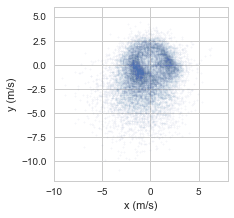

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAErBJREFUeJzt3XlQU+e7B/BvCFIpKGBV7K1Dq6J1XIAoogwFr9W6FBFc
sWppi0Vk6qi1LmjFFetS7YzjiILWpThTd1pbl1rbKnd0REH0grhFBYuKgBJJQiBAnvuHP841JiQ5
mhCE5zPjH3nfNzkPR77mnPe8niMhIgJjzGIO9i6AsdcNh4YxkTg0jInEoWFMJA4NYyJxaBgTqUmF
prq6GitWrED//v3Rv39/rFu3DrW1tVYbDwAqlQphYWFQKBT1jlmyZAnef/99vT8rVqyod/ytW7cw
efJk+Pr6IjQ0FOnp6eZ/WDOmTp1qUMOPP/5Y7/jMzEyMHj0aPj4+GDt2LHJycoS+kydPYuHChS9d
y82bN9GrVy9kZGQIbTqdDikpKRgyZAhkMhkiIyORlZUl9L9Ye92fV6nDaqgJWbNmDX300UeUnZ1N
Z8+epaCgINq8ebPVxhMRrVy5krZu3WpyzMSJEykpKYmKi4uFP0ql0uhYjUZDISEhlJCQQHK5nDZv
3ky9e/em/Px88z+wCcHBwZSWlqZXQ0VFhdGxRUVFJJPJaOPGjSSXy2nZsmXUv39/evr0qTBm7Nix
lJGRIbqOmpoaGjNmDHXr1o3Onz8vtO/cuZMCAgLozz//pLt379LatWvJz8+PCgsLiYj06i4uLqZD
hw5Rz549KScnR3QN1tZkQlNZWUm+vr506tQpoe3w4cMUGBhItbW1rzye6NlfpJ+fHykUCpO1BAQE
0JkzZyyqOy0tjQIDA0mr1QptU6ZMoTVr1lj0fmOUSiV169aN5HK5ReM3bdpEERERwmudTkeDBw+m
1NRUvTqnTJkiupYtW7bQ5MmTDUIzcuRISk5O1hs7dOhQ2rlzp8FnqNVqCg4Opi1btojevi00mcOz
a9euQaPRICAgQGjz9/fH48ePce/evVceDwD79u2DTCaDm5tbvXWUlJRAoVCgU6dOFtV96dIlyGQy
tGjRQmjr168fsrOzLXq/MXK5HI6OjvDy8rJofHZ2Nvr16ye8lkgk6Nu3r14NgwYNQnZ2Nm7cuGFx
Hbdu3cLu3buxfPlyg76EhASMGjXKoF2pVBq07dy5Ey1atEB0dLTF27alJhOaR48ewdnZGa1atRLa
2rVrBwAoKip65fEAcPr0aQQHB5usQy6XQyKRYNu2bRg4cCA+/vhj7NixAzqdzuj44uJitG/fXq+t
bdu2ePTokcntmKvB1dUV8fHx+OCDDxAeHo60tLR6x1tSg5ubG3r37o0zZ85YVENtbS3i4+Mxa9Ys
dOjQwaA/ICBAr/306dPIz89HYGCg3rjKykrs3r0bsbGxcHJysmjbttZkQqPRaPDGG2/otdXtZK1W
+8rja2trkZeXB29vb5N13LlzBw4ODvDy8kJKSgqio6OxefNmbN++XVTdxmqw1O3bt1FZWYnAwEBs
374dERERSEhIwNGjR1+pBm9vb+Tm5lpUw/bt2+Hq6orIyEizY+VyORYsWICRI0fC399fr+/333+H
g4MDwsPDLdpuQ3C0dwHW0rJlS4O/5LrXzs7OrzxeoVCgtrYWHh4eQtuXX36pN+Nz9OhRTJo0CaGh
oXB3dwfwbBbo6dOn2LVrF6ZNm2ZxHS1btjT6c4aGhuLBgwfCa2OHcXPnzsX06dOFw8ju3bvj33//
RWpqKkJDQ1+6Bnd3d9y5c8doXc+Ty+XYsWMHDh48CIlEYnJsbm4uYmJi0LVrV6xatcqg/9ixYxgx
YoRBqO2pyYSmQ4cOqKiogEqlgqurK4Bn5xcA4Onp+crj6/7ynz/MWrVqFSorK4XX7du3h0QiEQJT
x9vbG6WlpaitrYVUKtXr8/T0FLZbp6SkxGgNAJCSkoKamhqjfXWkUqnBeVeXLl1w+vRpo+MtraG2
thYODuYPTk6cOAGlUmlwzhITE4OIiAhh+v3ixYuIjY2Fr68vkpKSDEJaUVGBCxcuICYmxuw2G1KT
CU337t3h7OyMrKwsDBw4EMCzaw9t27Y1ekIsdryHhwccHR1RVlYmtBn7xV61ahXkcjl27twptOXm
5uK9994zCAwAyGQybNiwATU1NXB0dBTqkMlkRn/Od955x9RuAADMmDEDbm5uev9yX716FZ07dzY6
XiaT6QWKiHDp0iWDE++ysjLhvM+UKVOmICwsTHit0WgQHh6OxMREBAUFAQCuX7+OadOmISAgAJs2
bTJ6vpKXlwciQp8+fcxus0HZe/rOmlauXEkffvghZWZm0rlz5ygoKEjvmkpZWRmVlZVZPP5F48aN
M5gmfdH58+epe/fulJycTAUFBZSWlkZ+fn7066+/EtGz6xbFxcWk0WiIiEilUlFQUBDFx8eTXC6n
pKQk8vHxoXv37r30fkhLS6MePXrQwYMHqaCggHbt2kU9e/akixcvEhFRVVUVFRcXU1VVFRERPXz4
kHx9fWnDhg0kl8tp+fLlNGDAACovL9f73NGjR9OOHTuI6Nn1peLiYqqpqTFbj0qlMphyjoiIoKFD
h1JhYWG917P27NlDQ4cOfen9YCsSIvv9J7TnzwesQavVYvfu3Th//jxatGiBkJAQTJw4UTikWLly
JYBn052WjH/R4cOHcevWLSxYsMBkHRcuXMDhw4fx8OFDeHh4ICwsDIMHDwbw7LBn1qxZiI2NFb7h
8vPzsWPHDhQUFMDT0xNTpkyBj4/PK+2LU6dO4fjx4ygtLYWnpyfGjx8vTCvn5eUhMTERixcvRo8e
PQA8+zb86aef8OjRI3h5eeGLL77Q+2aqqKhAbGws1q1bh7fffhtnzpxBcnIyNm7caPbbp7KyEtHR
0cL2ioqKMGfOHKNjQ0NDMXnyZADAgQMHkJOTY3I1hS317dvXeIc9E5uZmWnPzRtlqqaioiLy9fWl
kpKSBqyoceynvXv3UlRUFBH9fz0xMTENvi/qY+19ZOrzmsyUc0Pw9PTE6NGjsW/fPnuX0qCICD//
/DPi4uKEtkuXLsHBwQFt27a1Y2X2waERac6cOTh27JjJBZtNzYkTJ9CtWzcMGDBAaPPx8cGWLVvs
WJX9NJnZs4bSqlWrei8SNlUjRozAiBEj9NrqZvqaI/6mYUwkDg1jInFoGBOJQ8OYSBwaxkTi0DAm
EoeGMZE4NIyJxKFhTCQODWMicWgYE4lDw5hIHBrGROLQMCaSyfXd1dXVWLRoEe7fvw+tVou4uDh4
e3sjPj4eEokEXbt2xdKlS+Hg4ID9+/dj7969cHR0RFxcHAYNGtRQPwNjDcpkaI4cOQJ3d3d8//33
UCgUiIiIQPfu3TF79mz0798fS5YswV9//QU/Pz+kpqbi0KFDqKqqwqRJkxAUFNRo7ojImDWZDM3w
4cMxbNgwAM/+y6tUKsXVq1eF+x+HhITg7NmzcHBwgEwmg5OTE5ycnODl5YXr169bdHMIa99cwxq4
JvMaWz1Aw9VkMjQuLi4Anj2TZebMmZg9ezbWrl0r3DjPxcUFSqUSKpVK757ILi4uUKlUFhVQ7x0/
7CQrK4trMqOx1QNYvyZTATQ7EfDw4UNERUUhPDwcYWFherc3UqvVaN26NVxdXaFWq/Xanw8RY02J
ydCUlpYiOjoa8+bNw7hx4wAAPXr0EJ5olZ6eDn9/f/j4+CArKwtVVVVQKpW4ffs2unXrZvvqGbMD
k4dnW7duRXl5OZKSkpCUlAQA+Pbbb5GYmIgffvgBnTt3xrBhwyCVSvHpp59i0qRJICJ8/fXXjeqG
1YxZk8nQLF68GIsXLzZo37Nnj0HbhAkTMGHCBOtVxlgjxRc3GROJQ8OYSBwaxkTi0DAmEoeGMZE4
NIyJxKFhTCQ

Wall time: 7.2 s


## 2.3 Overview by Month

In [41]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl8VOX1/9+zL5klM5NM9j0hIYCAO4gbbigqFutuW61a
tW61i9qKpdZatV+3qm1tq62t2l+txaWKS12qgIIIqED2fZ3MJJlJZt/v7484IzEBEnKzoPm8XnlB
5t773Ds393PPec5zzudIBEEQmMUsZnFQQDrdFzCLWcxi7Jgl7CxmcRBhlrCzmMVBhFnCzmIWBxFm
CTuLWRxEmCXsLGZxEGGWsF8DzK7cfXUwS9gpwPLlyykvL+fee+8ddXtXVxfl5eWUl5fjdDpFPffb
b7/N2rVrk78/+uijLF68WNRzeL1eTjzxRN544w1Rx53FSMwSdoogkUh46623Rt325ptvTtp5//a3
v2G32ydtfK/Xy/e//326u7sn7Ryz+AKzhJ0iLF68mM7OTqqrq0dse+ONNygvL5+Gq5oYtm7dynnn
nUdtbe10X8rXBrOEnSLMnTuXvLy8Eda0u7ubXbt2sWLFihHHvPXWW5x77rksWrSI448/nocffpho
NJrcvnz5cv785z+zdu1ajjzySA499FBuvfVWvF4vAN/61rfYunUr7733HuXl5XR2diaPfe211zjt
tNNYsGABq1evZseOHcltnZ2dlJeX8+ijj+7zO1133XXMmTOHJ5544oDuySzGj1nCTiFOPfXUEW7x
m2++ycKFC8nMzBz2+XPPPcf111/PIYccwmOPPcall17KX/7yF2677bZh+/3xj3/E7Xbz4IMP8oMf
/ID169fzhz/8AYC1a9dSWVnJoYceynPPPYfVagUgEAjw0EMPceONN/Lb3/6WQCDADTfckHwZWK1W
nnvuOc4777x9fp9nn32W3/72t5jN5gndl1mMHfLpvoCvE1asWMGTTz5JU1MTJSUlwJA7fPrppw/b
LxaL8fDDD7Ny5cpkwGjZsmXo9XrWrl3LlVdeSUVFBQCZmZk8+OCDSCQSli1bxvvvv88TTzzBkUce
yfHHH49Op0Or1fLDH/6Qv//978BQ1Pj//u//WLRoEQDRaJQbbriBxsZGKioqUCqVyW37wpw5c0S7
N7MYG2Yt7BRiwYIFZGVl8d///hcAm83Gzp07Oe2004bt19zcjNPpHOEmr1y5EoBt27YNG1MikSR/
T09PB4asq8fjGfU6ZDIZhxxySPL3nJwcgL3uP4uZg1nCTiEkEskwt/jNN9/kkEMOISsra9h+g4OD
AFgslmGf6/V6lEplco4KoNFoRpxDJpOxbNky7rnnnlGvQ6VSIZV+8adP/D8ejx/gN5vFVGGWsFOM
U089laqqKjo7O3nzzTdHuMMAqampAPT39w/73O12Ew6Hk9v3hdtuu43NmzczMDAgzoXPYkZglrBT
jEMPPZT09HT++c9/8tlnn41whwGKioowmUwjEhFee+215Bj7g06n46677qK1tXVYZHkWBzdmg05T
DKlUyimnnMJTTz2VnNN+GTKZjOuvv5677roLo9HISSedRF1dHY8++igrVqwYc7Bn2bJlpKen88kn
n6DRaAiFQmM6LhwOU11dTWZm5ojo9SymF7MWdhpw6qmnEolERl17TeDSSy/l7rvv5qOPPuKaa67h
2Wef5fLLL+f+++8f17l++ctfEggE6Ovro7GxcUzHOBwOLrjgAp5//vlxnWsWkw/JrKbTVwudnZ18
+9vf5t13301+tmnTJq644greeecdcnNzp/HqZjFRzBJ2FrM4iDDrEs9iFgcRZgk7i1kcRJgl7Cxm
cRBhdlnnK4B4PE4sFksqSwiCkPy/RCIZ9iOTyYalMk4HXn75Zf70pz8BcNxxx3HrrbeOut8jjzyC
RCLhhhtumMrLm9GYJewMhiAIRCIRwuEwkUgk+RMKhZKfRaPRcacUymQyFAoFCoUCpVKJUqlM/q5Q
KFCpVMjlk/NoBAIB7r77bl5//XWMRiMXXXQRH374IUuXLk3u43a7ueeee3jttde48sorJ+U6DlbM
EnaGQBAEwuEwfr8fn8+Hz+fD7/cTj8eRSqXJH7lcjlwuR6PRYDQaUalUSdIlSCaVSonFYnz66acs
WrQIiUSCIAhEo1HC4TChUChJ+sQ5E8SPx+MIgoBCoUCr1SarfbRarSgkjsVixONxgsEgOp2OWCyG
SqUats9bb71FUVERl19++YTP91XDLGGnCdFoFI/HM4KccrkchUKBRqPBYrFgNBpRKBQTOlciuV8m
k6FSqdDr9XvdVxAEAoEAg4OD+Hw++vr6iEQixOPxYSROSUlBp9ON273W6XTcdNNNnH766Wg0Go44
4ogRqZbnnnsuwH4L6L+OmCXsFCIUCjEwMIDL5cLn8yVdU61WS3p6OkajEZlMNq3XKJFIkhZ1T4TD
YVwuF263m97eXrq7u5FIJBiNRlJTU8d87bW1taxbt47//e9/6PV6fvzjH/Pkk0/Our5jxCxhJxGC
IOD3+3G5XAwMDBAKhVAoFOh0OnJycvZp6WYalEolGRkZZGRkAEOBLqfTSX9/P+3t7cRiMVJSUjCb
zUlXfTRs2rSJJUuWJEsHV69ezT/+8Y9Zwo4Rs4QVGYIgJF3JgYEB4vE4KpWK1NRUMjIyJuzezhRI
pVLS0tJIS0sDwOfz4XA46OnpoaOjA5VKhclkIj09HaVSmTyuoqKC++67j+uvvx6tVsu7777LvHnz
putrHHSYJaxIiMViuFwu7HY7oVAIlUpFZmYmVqt1WLH4VxUpKSkUFRUBQ66/3W6nv7+fnp4ejEYj
VqsVvV7PsmXLqK6uZvXq1SiVSubPn8/3vvc9br/9dpYvX85JJ500zd9kZmM2l3iCCAaDOBwO+vr6
kEqlpKamkpOTM+2WdM8o8XTOi71eL11dXfh8PuRyORkZGVgslklbNvqqY/auHQAEQWBgYAC73Y7P
50OtVlNQUIDZbJ72pISZBp1OR3l5ObFYDJvNRk9PD11dXZjNZqxW64jg1iz2jVkLOw4IgoDT6aSr
q4tYLIZOpyMvLw+1Wj3dlzYCM8XCjgaXy0V3d3dyLTY3N5eUlJTpvqyDArMWdgwQBAG3201HRweR
SASTyUReXt6MI8LBApPJhMlkIhAI0NbWRm1tbXIqMRNffjMJs4TdD7xeLx0dHQQCAVJTUykoKJgl
qkjQaDRUVFQQCARoaWmhqqoKi8VCdnb2sMjyLL7ALGH3gkAgQGdnJx6PB71ez4IFC6Y9kPRVhUaj
obKyEq/XS2trK7t378ZqtZKZmTkbnPoSZu/GlxCNRuno6MDpdKLVapk7d+4I7d9ZTA50Oh3z58/H
6XTS2dlJb28vWVlZZGRkzAbzPscsYfeAy+Wira0NqVRKWVkZBoNhui/pawmz2YzZbKa7uxubzYbT
6aS4uHh2fsssYYEhq9rW1sbg4CDp6enk5OR8LZIdZjqys7OxWq00NjZSXV1Ndnb2197afu0J63K5
aG1tRaFQzLq/IuLdd9/lsccew+/3s2zZMtasWTNs+8aNG/nxj3+c1D2urKwctbWIXC6noqKCvr6+
5FTl62xtv7aE3dOqZmRkkJ2d/bV+c4uJjo4O1q5dy/PPP4/FYuE73/kO7733HieccEJyn507d3Lt
tddy2WWXjWnMtLQ0TCbT197azhi/L9FE+P333x/2+fLly4c1Io5EIixevBin05n87Fvf+layhhKG
mkktXryYcDg86rlcLhe7d+/G7/czd+5ccnJyDvo/fDweJxwOEwwGCQaDSZX/UChEMBgkEokwVTky
b731FmeccQaZmZkoFAoeeughFi5cOGyfXbt28d5773HOOedw7bXX0tPTs99xZTIZ5eXl5OfnY7PZ
qKmpIRgM7ve

Wall time: 18.4 s


In [42]:
df.describe()

lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.424413     -0.955729      2.562621   
std    4.703954e-12  9.172000e-11      1.802065      2.067680      1.431391   
min    4.700000e+01  2.370000e+02     -9.166093    -10.918585      0.010145   
25%    4.700000e+01  2.370000e+02     -1.656267     -2.149330      1.633600   
50%    4.700000e+01  2.370000e+02     -0.585217     -0.742086      2.216330   
75%    4.700000e+01  2.370000e+02      0.983090      0.491738      3.116656   
max    4.700000e+01  2.370000e+02      6.275871      4.432800     11.387119   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     200.814362  2.010567e+07    900.000000    190.187829  
std       93.742468  2.872210e+04    670.843355     86.668069  
min        0.002977  2.006010e+07      0.000000      0.002385  
25%      141.233901  2.008070e+07    450.000000    125.253343  
50%      218.459009  2.010567e+07    900.000000    201.846276  
75%      266.495076  2.013070e+07   1350.000000    249.810863  
max      359.992136  2.015123e+07   1800.000000    359.994014

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
# FIT_METHOD = 'chi_square'
# FIT_METHOD = 'k_s'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

[-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6. ]


# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

0.4
Wall time: 25.3 s


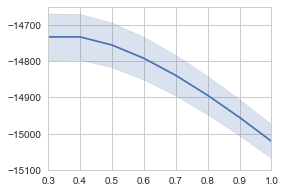

In [46]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.3,1.1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=40000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [48]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.4 625
[ 0.00034972  0.00033915  0.00041835  0.00057211  0.00073192]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQK3d9L/rp1r7Mvu9nNMfHyYNr44UEQlEpjInBZUi8
EGNCHsEmUJQTJyGAgUsoSAjgBPADEoMhGBK/G5YQihtuXqDgwY1DknJsY5MHpgiemTMjjUaj0b6r
1cv7Q+fX02p1t3rVqMf9qZo6y/Svfy2p+6PPd6cEQRDgwYMHD2cU9GlfgAcPHjw4CY/kPHjwcKbh
kZwHDx7ONDyS8+DBw5mGR3IePHg40/BIzoMHD2caHsl58ODhTMMjOQ8ePJxpeCTnwYOHMw2P5Dx4
8HCm4ZGcBw8ezjQ8kvPgwcOZhkdyHjx4ONPwSM6DBw9nGh7JefDg4UzDIzkPHjycaXgk58GDhzMN
j+Q8ePBwpuGRnAcPHs40PJLz4MHDmYZHch48eDjT8EjOgwcPZxoeyXnw4OFMwyM5Dx48nGl4JOfB
g4czDf9pX4CH04cgCGAYBizLwufzIRAIgKZpUBR12pfmwYNlUIIgCKd9ER5OD+12G+VyGWNjY+h0
OgCAdDqNqakpjI2NgaZpj/Q8uBqeknsWg+M4NJtNHB8fIxaLgWVZBAIBCIIAQRDAcRxYlgXDMKAo
Cj6fzyM9D66DR3LPQgiCAJZlwXEcKIoCx3HY3t4Gx3Hw+/3geR6NRgOhUAh+/8ktQkiv3W6Dpmn4
fD74fD74/X6P9DyMLDxz9VkGnufR6XRAPvbDw0MUCgWsr68jGAyCYRhkMhlQFIVOpwO/349oNIpI
JIJoNAqfz9dzPnIeiqJEsvP7/X3HefBwWvCU3LMExPzkOA4AwLIsUqkUeJ5HIBDA2NgYGIZBOBxG
IBDAxMQEYrEY2u02Go0GyuUyjo6ORNIjxCclM5ZlIQgC2u22R3oeRgYeyT0LwPM8WJYFz/OgKArV
ahUHBweYnp7G+Pg49vf3e46nKAqCIICiKITDYYTDYUxPT0MQBLRaLTSbTZRKJWQyGQQCAZHwtEiP
prvZSp1OB+Pj4x7peRgaPJI74yB+NBJMyGQyqFQqWFtbE5WaXo8FRVEimUlJr9FooFQq4fDwEMFg
sMe8JeQmCAKazSay2awYwCB/ekrPg5PwSO6MQm6eMgyDZDKJYDCIra0tMaBgJVggJT2gqxiJ0isW
izg8PEQoFBIJj6whSlGu9DzS8+AEPJI7g5Cbp8ViEZlMBvPz85ienu4jNrmSIyRkFDRNi/66mZkZ
kfQajQYKhQJarRYAIJfLieQoVXoe6XlwAh7JnTFIzVOe53F4eIhms4nNzU2Ew+G+451M+5CSHgDU
63Vks1kAQD6fR7vdRjgcFpVeOBz2SM+D7fBI7oxAEAQcHR0hGo0iFAqh1WohmUwiFotha2tLJA+1
tYCzhAd0SY+maczOzgLoKs5ms4lGo4FcLieSHvHp6SW9YDDo5eh5UIVHcmcAJPetWCzC7/ejWq3i
+PgYy8vLmJiY0FyrRA5mzdVBkO9F0zRisRhisRiAkwoMUoXBMIxo1hKlR84hJz2GYcBxHKamphAI
BDzS8yDCIzmXg1QuEBBzcGtrC8FgUNc5RiUf3OfzIR6PIx6PAzghvUajgWw2i06n06f0CJmRgEck
EkGr1eqpyPBI79kNj+RcCnlpVq1WQ7PZxNjYGNbW1nQ/1GrHjQLxaZHe0dERWJYVSY8QvVzpdTod
j/Se5fBIzoWQBhcA4OjoCMViEeFwGJOTk5Yf4FElADnpsSwrkl6tVhNTZojSC4VCHul58EjOTZDn
vnU6HaRSKVAUha2tLaTTacPndMr/Ngz4/X6MjY1hbGwMoVAIzWYT8XhcTE7mOE7050Wj0Z4AhZT0
SCCDEJ9HemcLHsm5BPLct0qlgoODA8zOzmJ2drYnydYOuJH4aJoWSQ/oKr1GoyGWoUlVnpz0eJ4X
AzhS0vP7/fD7/R7puRgeybkAHMeJDS0FQcDh4SGq1So2NjbEHDTAnCqT1qlK/89tUHrdfr8f4+Pj
GB8fB9BVvsS8LZVK4Hm+R+lJFZyU9DqdDqrVKhYWFjzScyE8khthyIMLJPctHA7j/PnzXkKsDIOI
JxAIIBAI9JAeUXqFQgGCIPQoPUJ6RBES85aiKE/puQgeyY0opOYpABQKBRwdHWFhYQFTU1O25bdJ
fVRWzuNGkJZSExMTEAShR+kVCgUAQCQSERuJShWvVOl5pDfa8EhuBFEsFuHz+RAKhcDzPNLpNFqt
lmppFsGzhZycAEVRCAaDCAaDPaTXaDRQrVbRbrexu7urqPQAj/RGGR7JjRCIeZrL5TA+Pg6O45BM
JjE2NjawNMsKzgI52n39UtILBAIoFApYWFhAo9FAvV5HLpcDTdMi4UUiEVXSA9AzH8Pn83mkN0R4
JDcikOa+kehpvV7XVZpFYBdZuZX0nCIOQRDEGtlgMIjJyUlxjCPJ0SN98qSBDKmC80jv9OCR3ClD
nvvGcRzq9TpomjZUmgWYJye3ktppgqIohEIhhEIhTE1N9ZBetVoVSU/aKl6N9I6PjzE5OYlYLCZ2
WPFIzz54JHeKUGtL7vf7MTk5aYjgPDgHeYqNEpRIr91uo9lsolKpiPMxpOYtIb1WqyVGbhmGAYC+
+Rge6ZmHR3KnBHlpViaTQalUwurqKiqViqmb2ooiy+VyqFQqCIfD4mhCD12YVcdkPoaU9JSGAkmj
6ORzJ+pePvPWIz3j8O7kIUOe+9bpdJBMJuH3+3H+/HmxVdKwzE7ygFWrVczPz/fUgjabzR5zy47A
h1NmsR61ZQV21AOrDQXiOE6cjyFVelIy80jPPDySGyLk5mm5XEY6ncbc3BxmZmbEG9WKIjOyrtFo
IJlMgqIorK+vizMbSFdhUgdKWpeHQiGR9KQNLfXCrQ+iEwQqnY9RqVSwuLgIQRBUhwJ5pGceHskN
CdK+b4IgIJ1Oo16v49y5c+IgGAKnAwiCICCfz+P4+BgrKytIp9OKZV3k4SLzGojKkza0JKQn7fjh
wRik0Vu9Q4GIsvZIbzA8knMYaqVZkUgEW1tbiqVZVkiO+HbUwLIsDg4OwLKsGL1Np9MD1YpaF99G
o4FMJgOWZVU7fgwDTkaHnTaFlc6vZygQUdbSoUBS0mNZFgzDIJ1OY2VlBYFA4FlJeh7JOQhpYT3Q
Hd6SzWaxuLiIqakp1XV6yEptndbDTszT8fFxrK2tieammRteqbdbo9FAo9FAsVgU60Clxe9Ow60P
rh4SlQ8FkpLeoKFAxO9H0lykSi8QCPSQ41mER3IOgOS+/fjHP8b58+cBAOl0GgzDIJFIIBQKaa63
O29Nbp6SAnX5MVZ8gtKOH9KSKDKkhqZphEIhUWG4KXp7GkpuEJRIT2koUCQS6YvcAr1K76yTnnvu
NJdAXlhfr9eRyWQwPj6O1dVVXc56O31yHMchlUr1mKdK6+yEtCRKWh1AqjguXrwopk9II4kezEPu
TpCSHgDs7OyIreLlQ4EAZdLz+Xxivp6bSc8jORshz30jxfVq6kkLdpAcMU/J3Ac9Ywmt7K91XaFQ
COPj46jX69jY2BBNLRJJtBq5dRKjqOQGgZBeJBJBqVRCIpEQJ6Fls1nNSWjAyb0sbxXvRtLzSM4G
EPOUZVmx/1gqlYIgCFhfXxf9Vnph1VwVBAGFQgHZbNbUWEKnb2Bp+gTQ61+Sz19VegCVQCKUboST
JErObWQokHQSmjyQ0W63QVFUX0XGKMMjOYtQK82anp4Gy7KmbgCzNzwJWCSTSd3+v1GA3L+k9ACe
duTWSRICnG0uoHRuJdIjDUSl7zl53+UpQtKZt4VCAZOTk4hEIiJZjhLxeSRnAfLct0wmg0qlgrW1
NcRisaFWLgA

## 4.1 Bootstrap GOF limit

In [50]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 8.55 s


In [51]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQwAAADXCAYAAADvAm/LAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE45JREFUeJzt3X1wVOXdxvFvXgjkZU2ASTpqINJINANCk1jUCigpAlrk
raAhMQ5Nx1qqWGmYBDATYktCKCgiVQHRytAgUuogwowO0BidNlPbpWChQIYlbAmUAImBkKR52Zzn
D4d9pAK5s9klm+b6/LWbPffZK7/ZvXJ292Q2wLIsCxERA4HdHUBEeg4VhogYU2GIiDEVhogYU2GI
iDEVhogYC+7uAPJNqampnDp16oqfhYWFceedd5KTk0NSUlI3JZPeLkDnYfif1NRUHn/8cWbMmAGA
ZVmcOXOGl19+mcOHD7N3714iIiK6OaX0RnpJ4qfCw8OJjo4mOjqamJgYRowYQXFxMXV1dfzlL3/p
7njSS6kwepCQkBAAgoKCOtz22LFjZGZmkpSUxL333ssLL7xAY2Oj+/a3336bsWPHkpycTFFREc8+
+yxr1qwBYOHChTz33HNX7C81NZXf/e53ALS1tbFq1SpSU1MZNmwY3/ve9ygsLMTlcrnXL1iwgFmz
ZjFq1Cj+/Oc/09raysqVK7n//vtJSUnhxz/+McePH/fKXOTGUWH0ELW1tRQWFhIdHc3dd9/d4fbZ
2dnccsstfPDBB6xbt47y8nLWr18PwO9//3vWrFlDbm4u7733HqdPn6asrMw4y4YNG/jggw8oLi7m
448/Jicnh5KSEv74xz+6t9m5cycZGRls3LiRpKQkXn31VT799FNeeeUVtm7dypAhQ8jMzKS+vr7z
w5Buo8LwU8XFxSQlJZGUlMTIkSMZO3YsNTU1/Pa3vzV6/6KqqoqoqChuueUWRo4cyRtvvMGUKVMA
ePfdd0lLS+MHP/gBQ4cOpbi4mNDQUONst99+O8uWLWPUqFHExsYybdo04uPjqaiocG8zZMgQpk2b
RmJiIgEBAbzzzjsUFBTw3e9+l/j4ePLy8oiIiGDHjh2dH450G31K4qeefvpppkyZQktLC5s3b2b3
7t08++yzDB061Gj9vHnzWL58Oe+//z6jR4/moYce4uGHHwbA4XCQlZXl3jYiIoI77rjDONv48eP5
/PPPWbFiBZWVlVRUVHDy5EkmTJjg3mbQoEHuy//6179oaWkhKyuLgIAA98+bm5v1sqSHUWH4qf79
+xMXFwfAkiVLqK2tZe7cuezYsYObb765w/Vz5sxh0qRJ7N27l88++4ycnBw+++wzli1bRr9+/Whv
b79i+8vvjwBXPKkva2trc1/+zW9+w8aNG/nhD3/IhAkTyM7OJjs7+4rt+/Xr5758+b2Nt99+m4ED
B16xnT7t6Vn0kqSHWLJkCUFBQRQUFHS4bXNzM4WFhbS2tpKRkcHatWvJz89n165dACQkJHDgwAH3
9i0tLRw9etR9vU+fPjQ0NLivNzQ0UFtb677+1ltvkZuby8KFC5k2bRqxsbGcPn2aa31CP3jwYIKD
g6mtrSUuLo64uDgGDRrE6tWrr8gh/k+F0UMMGDCA7OxsPvnkE/bs2XPdbfv27cu+ffv45S9/SUVF
BQ6Hg927dzNixAgAfvKTn7B161a2bdvG8ePHefHFFzl37px7/V133cXf/vY3ysrKOH78OHl5eQQG
/v9D5Vvf+hZlZWU4nU4OHTrEz3/+cy5cuEBLS8tV84SHhzN79mwKCwvd6woKCigtLTV+iSX+QYXR
g8ycOZOkpCSKiopoamq67ravvPIKgYGBpKenM3PmTEJCQli5ciUAY8aMIT8/n9dee40ZM2YQGhpK
YmKie+3UqVOZPHky8+fPJyMjg8TERJKTk923FxcXU1VVxaOPPsozzzxDbGwsM2fO5NChQ9fMk5OT
w8SJE1m8eDFTpkyhoqKCDRs2XPFeh/g/nekpAMyYMYNx48Yxb9687o4ifkxvevZAtbW17jcSryYs
LIzw8PAbmEh6CxVGD5Senk5lZeU1b3/qqadYsGDBDUwkvYVekoiIMb3pKSLGVBgiYkyFISLGOvWm
5/Tp092n8sbGxrJs2TKfhBIR/2RcGM3NzViWxaZNm3yZR0T8mPFLkiNHjtDU1ERWVhZPPvkk+/fv
92UuEfFDxh+rHj16lAMHDjBr1ixOnDjBU089xUcffURwsE7lEOktjJ/tQ4YMIS4ujoCAAIYMGUJU
VBTnzp277r9a2+12r4QUkc5LSUnx+j6NC2Pbtm1UVFRQUFBAdXU1ly5dIjo6usN1vgjtK3a7vUfl
hd6duaKigqeL9xDR/1aP1l/68hTrFo4nISHhutv11Bn7gnFhzJw5k0WLFjF79mwCAgIoKirSyxGR
Xsb4GR8SEsJLL73kyywi4ud04paIGFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaI
GFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaIGFNhiIgxFYaIGFNh
iIgxFYaIGFNhiIgxFYaIGOt0YdTU1PDAAw/gcDh8kUdE/FinCqO1tZX8/Hz69evnqzwi4sc6VRjL
ly8nLS2NmJgYX+URET9m/GXM77//PgMGDGDMmDGsX7/e+A589bXzvtLT8kLvzex0Oru8j4MHD1Jf
X9/hdj1xxr5gXBh/+MMfCAgIoLy8nMOHD5Obm8sbb7xBdHT0ddelpKR0OeSNYrfbe1Re6N2ZbTYb
7DzTpX0MHz6chISE627TU2fsC8aFUVJS4r6cmZlJQUFBh2UhIv9b9LGqiBgzPsL4uk2bNnk7h4j0
ADrCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabC
EBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFj
xt985nK5yMvLo7KykoCAAF588cUOv8RWRP63GB9hlJaWArBlyxaef/55Vq1a5bNQIuKfjI8wxo8f
z4MPPgjA6dOnuemmm3yVSXoJl8uFw+HweH1lZWWX7t9qbzfah9PpxGazXfW2+Ph4goKCupSjJwmw
LMvqzILc3Fx2797Nq6++yujRo6+7rd1u71I4+d/mdDpZXvIFYZExHq2vqTrMwNhEIvrf6tH6syf2
AQEe33/jhbPkZowgLi7Oo/W+lpKS4vV9dvrb25cvX86CBQt47LHH2LVrF2FhYdfd3hehfcVut/eo
vNCzM9tsNsIiz3j8hG+8UN3lLGGRMR7fP8Dw4cP98r08X/2xNn4PY/v27axbtw6A0NBQAgICCAzU
hywivYnxEcaECRNYtGgRGRkZtLW1sXjxYvr16+fLbCLiZ4wLIywsjNWrV/syi4j4Ob2mEBFjKgwR
MabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabC
EBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMabCEBFjKgwRMWb8RUatra0sXryYU6dO
0dLSwty5c/n+97/vy2wi4meMC2PHjh1ERUWxYsUK6urqmDZtmgpDpJcxLoxJkyYxceJEACzLIigo
yGehRMQ/GRdGeHg4AJcuXeK5557j+eef91koX3O5XDgcjm/83Ol0YrPZjPYRHx/fq0vzWjM0cXnO
lZWVXk51Y1nt7V75HXrSY8m4MAD+/e9/88wzz5Cens6jjz5qtMZut3sUzJecTifLS74gLDLmmzfu
PNPh+sYLZ8nNGEFcXJwP0nVed8z4ujM0sfMMNVWHGRib6N1gN1BT/Tny158nLNKz4gT/eyx1xLgw
zp8/T1ZWFvn

## 4.2 Bivariate Empirical Limit

In [52]:
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar, gofs_bivar_set=[], {}

# for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
for year_length, line_style in zip([5, 10], ['-.','-']):
    # 1. Set time
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs_bivar
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    # 3. Make plot
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
        gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
align_figures()
if len(gofs_mean_set_bivar)>0:
    gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
    display(gofs_mean_set_bivar)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlAlNXexz8z7JssyqYoirhviCaaiUqaueVFcIEkLete
uy5lWma3zN72zdJuWZZm2eJ2jdRKM/ddBEVFUFkVFJCdYRtm5rx/kJMkIMswCz6fv+DZzu/MM985
5znP73yPTAghkJCQMHrkhg5AQkKifkhilZAwESSxSkiYCJJYJSRMBEmsEhImgiRWCQkTwWBijY2N
JSIi4o7t+/btIyQkhGnTprF582YANBoNy5YtY9q0aURERJCWlqbvcCUkDI65IQr98ssv2b59OzY2
NtW2V1ZW8vbbb7N161ZsbGwICwsjKCiImJgYlEolmzZt4uzZs7zzzjusXr3aEKFLSBgMg7SsHTp0
4JNPPrlje1JSEh06dMDR0RFLS0sGDBhAVFQU0dHRDBs2DAA/Pz8uXLig75AlJAyOQVrWMWPGkJ6e
fsd2hUKBg4OD9n87OzsUCgUKhQJ7e3vtdjMzM1QqFebmtYcfHR2t26AlJHTMgAEDGnS8QcRaG/b2
9pSUlGj/LykpwcHB4Y7tGo2mTqHeoqYPIzo6usEfkjEj1af+5Jbms+nCDg6mnEAgsLe0o69HD/w8
etLPoyfONo7NUu6tOlWq1KjVAmsr80Y1JkYl1s6dO5OWlkZBQQG2tracPn2a2bNnI5PJ2L9/P+PG
jePs2bN07drV0KFKmBAlylIi43fz65X9VKorae/YlvC+/6C/Ry/kcv09Cf4RdY0Nv8azJGJgo843
CrHu2LGD0tJSpk2bxosvvsjs2bMRQhASEoK7uzujR4/m6NGjTJ8+HSEEb731lqFDljAyiioUXCu8
Tm5pPgplCcUVJRQrFSgqSjiXlYBCWUJrG2em9ZlIoHeAXkV6C1cnG9q2saODhwPJxQ0/32Bi9fLy
0r6amThxonZ7UFAQQUFB1Y6Vy+X83//9n17jkzBeVBo1J9NjuJKbyrXC61wtvE5heVGtx9ta2BDe
9x+M6zISS3NLPUZanYE93BnYw73R5xtFyyohUR80QsOJa2fYdH47NxTZ2u2udq3xb9uHDo5tcbNr
g4OVHfaWdjhY2mFvZUcrKwfM5WYGjFvwy5Fkhvt7YW/b+B8LSawSJsG5zHh+OBdJcv5VzGRyHvIN
JNA7gPaObbGxsDZ0eHVyOaOcjYfOk5RRyIJp/Rt9HUmsEkZNav41NsT+j/NZlwAY2mEg03pPxMPB
zcCR1Q8hBIfjqh5QJw3v3KRrSWKVMAhCCDRCg1kt3dOCskI2nt/O/pTjCAR+Hj0J6/sPOjm313Ok
TeN8Ug4ZuUoG9/bA26NVk64liVVC76TkX2PViXVkl+TS09WXfn++5/Rq5YlKoyIyfjfbLv5GuaqC
9o5tmekXSl+PHoYOu1Fs2XsFgCkPNv11oyRWCb0hhGDXlQNsiN2GSqPC08GN2Mx4YjPjgf/R2saZ
yspKilQKHKzsmdFvMg/6DK219TV24lPyOHv5Jp3crejawbnJ15PEKqEXFMoSVp/aQFRGLA5W9swL
mEl/z97klRVwLjOes5kXOZ8ZT4mqlAldHySk1zjsLG0NHXajUas1rN4WC8DIvk3r/t5CEqtEs3Mp
J4mVx9eRU5pHL7euzB/8OC42TgC42DgxotMQRnQagkajISo6ioD+AQaOuOnsOJJCyvUiRt3XgQ6u
Gp1cUxKrRLNRUF5UNUiUfAxkMLX3BCb3GFtr9pBcLsdcbvpfyZKySn7YnYCDrQWzJvQk8ZJuZomZ
/icjYXSo1Cp+vbKf/8X9SpmqnPatPHlyYBg9XLsYOjS9YGdjwWtPDaFAUYGjvZXOriuJVUJnVKor
OXMjju9jf+KGIht7Szue8J/G6M7DTHaQqKGUK1VYW5rTo5OLzq8tiVWi0eSVFnA5N5nLOclczk0h
Jf8qlRoVcpmch7uMYGqvCdhb2Rk6TL1RrlSx4IMD3NfTnScn9UYmk+n0+pJYJRpMUXkxa2M2cfza
X3My5TI53k7t6Nrah4d8A2nv2NaAERqGCqWaDh4OWJjLdS5UkMQq0UBOXIvhq+gfKapQ0NnFmwCv
/nRt7YOPSweszXX3fGaKONpb8fITAag1zbN8lCRWiWooVUrUQnNHcnxxhYK1MZs4dvU0FmYWPOYX
wrguQQaZF2psqDWCryLPMzHQh7Zt7DGT675VBQOIVaPRsHz5ci5duoSlpSVvvPEG3t7e2v2RkZGs
XbsWBwcHgoODmTJlCkqlkqVLl3Lt2jXs7e1ZtmwZHTt21HfoLZ6C8iJe/P1t8soKsDG3xsXWCRcb
J5xtHInNjKewvIgurTsxd9BjtG3lYehwjYbIA4nsPJpCaYWKhWH+zVaO3sX6xx9/1GormpeXx6pV
q9i2bRutWrVi1qxZDBkyhAMHDmBra8vmzZtJTk7m9ddfZ+3atfoOvUWjERo+O/kNeWUFdGndCaVK
SW5ZARlFmQBYyM2Z0S+YCV1HSa3pbVzNLOL73Qk4OVgx+5HezVqW3sVal61oeno63bp1w8mpKrul
T58+xMbGkpiYSGBgIAA+Pj4kJSXpO+wWz6+X93M28yJ+Hj15MXAuclmVIJUqJXnlhdiaW9PK2uEu
V7m3UKs1fLzxDJUqDXND+9HKrnldKPQu1rpsRb29vUlMTCQnJwc7OzuOHz9Ox44d6dGjB/v372fU
qFHExsaSlZWFWq3GzKzud3e1Oci1NJvSptYnqyKH765tx87Mhges/TgTc0ZHkTUOU7k/h+OKuHKt
iL4dbbGouE509PVaj9VFnfQu1rpsRR0dHVm6dCnz58/HycmJXr164ezszIgRI0hKSiI8PBx/f396
9ep1V6GCZEVaH8pVFWz4/W00aHhm6Gz8PHvpMLqGYyr3J+1GEQc3HcTZwYoXZw/HoQ67lprq1Bjx
6v3hw9/fn0OHDgHcYSuqUqm4ePEiP/zwAytXriQ5ORl/f3/Onz/PkCFD+PHHH3n44Ydp3960JiAb
M+tjNnO9OIvxXR80uFBNBZVaw8cbY1CpNcyb4lenUHWJ3lvWmmxFb7ciBQgODsbKyorHH38cF5eq
tK2VK1fy+eef4+DgwJtvvqnvsFskx69Fsy/lGJ2c2hPed5KhwzEZ/rfvConphQQNbM+gXvobFde7
WGuyFe3c+S9vmnnz5jFv3rxq+11cXFi/fr0+wrtnKCgr5Iuo77Eys+SZIU9gYWZh6JBMBltrCzxb
2/HUpOYd/f07UlLEPcqvV/ZTWlnGrP5TTO6dqRBCm853PimH3cfTmDG2Ox6t7dBoBBohMDdrvie8
icN8GHt/x2YtoyakF2b3IOWV5exJOkwrK3tG+Txg6HAaRFpmEQs/Pkh8Sh4A2XmlHDyTTm5hOQCb
9lzilS+OUaio0HnZkQcTOXwmA0DvQgWpZb0n2Z9ynBJlKVN6jTeoQ31DEEKw80gK63fGoVRpOHM5
mx6dXBjSx5N+XVxxtLdCoxGkZRZzISmXhR8f5KVZg/D1ctJJ+ZUqNb8dS0Wp0nBfL3esLfUvHUms
9xgajYZfL+/DwsyCMb7DDR1OvcgvKmflpjNEJ2TjYGvJ8xF+DO7tCVQ9P9pa//W8/ULEQLbsvcx3
uxJY8t8jLJjqx3B/LwCKS5WUV6hxda5axLu8QoW1Vf0kYGFuxkcLh5OdX2YQoYIk1nuOUxlnySrJ
YZTPAyaRkXQ1s4iXVh+lUKHEv5sbz0zvj0ur2h345XIZ00Z3o1NbRz74PpoPvo9mf/Q1svJKSc9W
EDSwPQvD/Mm4qeCFTw4zJ7gvw/q3qzOGmIRsenduja21BR09DTcQJz2z3mPsuPQHABO6PWjgSOrH
+l8uUqhQ8vi

Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                
(2001, 2006)    0.136884  0.095219  0.000002    0.023214     0.198635   
(1991, 1996)    0.278536  0.108569  0.000001    0.020623     0.183561   

              R_square  
year_lim                
(2001, 2006)  0.985732  
(1991, 1996)  0.987252

## 4.3 Univariate GOF Limit

In [53]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOAAAACyCAYAAABba8MdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnWdgFOXahq8t2fRKSAVSqYEACRAQKSIQQIr0ZkTEwqdw
RFEBDwqKIjY8gAjqEVFRaXoQFAEpinQIJKSQ3kghhfS+Zb4fSxZC2iakwly/kpl3Zp7Z7J23PUUi
CIKAiIhIiyBtaQNERB5kRAGKiLQgogBFRFoQUYAiIi2IKEARkRZEFKCISAvSYgIMDg4mICCgyvHj
x48zdepUZs6cye7duwHQaDS89dZbzJw5k4CAABITEwFITExk9uzZzJkzh1WrVqHRaJr1HURE7hmh
Bfjyyy+F8ePHC9OnT690vLy8XBg5cqSQm5srlJWVCVOmTBEyMzOFw4cPC8uWLRMEQRCuXLkiLFy4
UBAEQXj++eeFc+fOCYIgCG+++aZw5MiR5n0REZF7pEV6wE6dOrFp06Yqx2NjY+nUqROWlpYoFAp8
fX25ePEigYGBDBkyBIA+ffoQGhoKQFhYGAMGDABg6NChnDlzpvleQkSkEZC3xEP9/f1JTk6ucryw
sBBzc3Pd76amphQWFlJYWIiZmZnuuEwmQ6VSIQgCEolE17agoKDOZwcGBjbCG4iIVI+vr2+92reI
AGvCzMyMoqIi3e9FRUWYm5tXOa7RaJDL5Uil0kptLSws9HrO3R9SYGBgvT+41kJL2q4uK6MwOgZF
OxuMHR3rfX11thcnXSfz75NknvyHsozM6i+USLDo3o12Dw2i3aCBGNq2Q5mfT/qfx7jxxyHKMrMA
kFtYYObpgZmHO2YeHlh4dcegju9Idkkuu0IO8Ff8WQQEpns9xvSe42u1ffnmUyjkUib1M6z3Z9Cq
BOjh4UFiYiK5ubmYmJhw6dIlFixYgEQi4cSJE4wbN46goCC6dOkCQI8ePTh//jx+fn6cPHmSgQMH
tvAb3B+U3bxJ2m8HyQ2+imG7dhg7O2Hk5ISxsyOaciX5oWHkhYWRHxWNRK1d+DJycsTa1xebfj5Y
ePVAamBQr2eWZmQQ+eF6CqOjAZAaGdH+keHY9PdFUKtRFRWhLipGVVhIQWQU+dciyA+/Rvx/t2Hq
5kZxcjKCUonUyAiHsf44jPHHxKWTboSkDwk5ybx5/GPKVGV0tHQioPcUejv0qPWauJQ8wuJu4tPV
rl7vW0GrEOCBAwcoLi5m5syZLF++nAULFiAIAlOnTsXe3p5Ro0Zx+vRpZs2ahSAIrF27FoBly5bx
5ptvsn79etzd3fH392/hN2nbFCUmkbrvVzJPnkJQqZDIZBTFxlXbVpBISLeWkdreEIsiNe4ZmZQe
+I20A78hVSgwcnLEyMEBIwd7jBwcMO/SGTMP92rvpSoqIvyd9yi5noy1r49WeAP6ITOsuUcpz87h
5rnz3Dx7jrzQMIwc7HEcNwa7Rx5BbmZaaXqiL3/GnqRMVcZTfaczxnN4pRFWTfx2Svv5PPawG5Sk
1Ot5ABJBeLCiIaob9jzoQ9CSlFTit20n55J2fmzs7ITT45OwGz4UdUkJJalplKSkkJeYSLGqFJd+
AzHq7M6umCMMdxvEh6e2klNwk1fsx2KbkE1eSBglaWloSksrPafT3Nl0mD5VJ4zAwED69u7NtTVr
yQ0KxnHCY7g/83Sla/QRkqa8HIlcjuSWYPaG/c7vkcd49eGFeNl10ftz0Gg0XE2PoI9j7b1ehe2d
u/Vi/juHsbE0YuvykQRdudy254AizYtGpSJ1336Sdu5GUCqx6NEdp8cnYdPfV/dllioUGFhaYtLF
k4//XEexsoT1vXtiKFfwlM8MAF5/+P/45dofePUfjcmjxgBEX89hx94LlKTdQJ6TxZCcYJJ++ImS
1DQ8X1yI1MAAQRCI++IrcoOCse7fD7f586rYeCIwmQthN3h+Si+szY2qfQ+pQoFG0KBWq5DL5DiY
tadIWcJ/A3/iI/+VyKWyWj8HQRAoVZVhbGCkl/gq+PN8IuUqDY8NdkMmrV9vW4EowAeUgugYYjdv
oSg+AQNrK9yfe4Z2gwbW2NvsizhCYl4KD7sMQHbXF9rVugOvPPQsSpWGGzn5mBhLkMukXEkpxdbK
ESPbjnyb4szC0nNknviLsvR0uq14HfXZ86QfPY6puxtdly5BIrt93+JSJSZGBpwOTuVC+A2CYzJ5
cqInY/p1RiKREJedSLGyBLnUgFJVKbtCD+Bt353Z3pN42GUAoRlRHI87zZGYvxnXZUStn0Vgagif
X/iOFwYE0M+5t16fn0YjcPBMPIYKGSMHuOh1TXWIAnwASdq5m+u79oBGg93IR3Gb/yTyO7Z57iY5
P41fwv/A2tiSZ3xm1dijbNhzgUtlv9LR3pw5fR5n0xv9cbRsT0mJhqfeOcLPDuN40SOEm6fPELRk
Kaqb2Sja2dB95QpkxsZkFN3EzrQd/1xJYctfv9O3jwEGnUtwsEoltzyHr8ONuHR1Bi9M8+bHq79y
Nf1aped3sHDUDVln9pzIueuX2RP6Gw+7DMDCsPr30wgadobsp0hZjIOZ/gspUamlZOSUMGaQK2bG
9VtwuhNRgA8Ymf+c5vpPuzC0s8Nz8QtYefeqtb1G0PDFhR2oNCqe8Z2NicK4xrbD+7gSccmGxPw4
3j9529EioPdUBvVy5J+gFIQX59HB2Ynk3XtBoaDHm//GsF07/oo/y/dBP/P15I+xMjcE8wwuZmgX
NUwMjOlk6URulgEXwtOI+U8Os2b40NXWHaVGhUbQ4OPYkx635nt/nInny32hjJ/8CKfSTpCUm0JP
+67V2nw68RJJeSkMcx1IB0v9t1LORxYCMH6wm97XVIcowAeI0vR0Yj/fitTICK/Vb2Ls7FTnNSXK
Ugzlhgzs4EP/GoZnqZmFOLU3o193B7Z0eZmLKcGkFtwgo+gmWUXZOJi3p6OfI/+EJHDkYiIvzZ2N
Za+eRCcnY+rmSlx2El9d+hGZVEaZqpxenrZ8YLsAAQ3WxpaYKUyRSCQIgsAuxyh+OBTB8T9NWPvC
OAzklVcqQ2Ky2Pq/EDQagZx4JzZMfafG3k+lUbM79AAyqazavb6ayCssI+VmOd6etrg46rf3XBOi
AB8QNCoVUZ/8B3VxMZ7/elEv8QGYKkz497DFlKuV1Z4/fuk6G3ZeZvGMvowc0AkDmZyHOlVdCbxR
kIVJr/Ocyozl2VJvrLx7IVWWU1BWyCenv0ClUWOTM5hfjscza1QXOlpV7Y0kEgkzR3bhenoBJ6+k
8NW+EF6YdvufQnp2Me9/exGpBMxMFVwITWfRtL5oBA1X0sLwcexZaY57KSWY9KIsxnQejp1pO70+
DwBLM0NeedwRt87d9b6mJsRwpAeE6zt3UxAZhe3Qh7Eb8Uid7QVBYG/YQbKKspFIJBjKFVXa5BWW
sWl3EMZGBnTuZFXr/SyMTLEyNUbSPoGjcScB7fB247ltZBZn4y7vR0KkMcnptbsTSiQSFs/og5uT
Bf8EpXAzr0Rn70c7LlFQXM5zk70ZM8iVkjI1F8JusCPoFz7453NOJ10iPCOan8MOkl2ci1+Hviwf
8gJTeoyt8/OoQKnSIAgCRgopTrY1z5v1RewBHwDyQkJJ3vsLhvZ2eCx8Tq8N6nPJl9kdeoC4nCRe
f3hhtW0uR2agUmuYO6IbLg61D8VMDIx51/8l3vjzA34I/ZlO1g4UqUtIL8zC3bwzocdscG5vxuIZ
feq0z0gh59/z/RAEgXaW2jmpRCLhucd7cSHsBmMHuZJ0I5/dR6P4+3IKC2YM4Y/oE2w8t013j/am
7Rjq6oePU+1z4LvZeyyKMyFpPOZT81y4Pog94H2OMj+fqPUbkEildF36MnJT0zqvEQSBn8P+QCqR
8mTvKTW2uxy

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012187  0.998669      0.923606
(1997, 2002)  0.009181  0.999039      0.959555
(1991, 1996)  0.011546  0.998940      0.926596

Wall time: 1.03 s


# 5. GMM by Expectation-maximization

In [54]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [55]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.357  -1.351  -0.834  0.911  1.160  -0.276
2  0.244  -1.185  -3.383  2.135  1.835  -0.061
3  0.240   1.609  -0.365  0.861  1.132   0.131
4  0.158  -0.243   1.624  1.159  0.722   0.036

GMM Plot Result
0.357327284619 [[-1.35112371 -0.83355858]] [ 0.83560435  1.21557793] -155.769071804
0.244423753834 [[-1.18524803 -3.38271559]] [ 1.82222716  2.14545523] -100.947534402
0.240182056686 [[ 1.608922   -0.36549123]] [ 0.84472276  1.14448327] 167.347290706
0.158066904861 [[-0.2426246   1.62415306]] [ 0.72160992  1.15907196] -87.8826231069


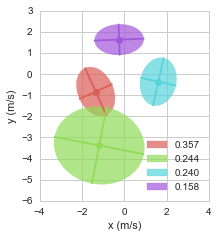

In [56]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [57]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYNHddL/qp3reZ6dn3rfvNG5UlJEEBkeshsoScoIQE
QlBEkyPn4cbLVQ9hO5oHkC2CIiCBwCFGucoiejlyvA8oT3gEhBMTSUQIBjMz70z39PR09/S+13b/
6PdXU11dVV1rT9ekPs8zzzvvTP3qV9Nd9enPd6d4nufhwoULF+cUnrO+ABcuXLiwEy7JuXDh4lzD
JTkXLlyca7gk58KFi3MNl+RcuHBxruGSnAsXLs41XJJz4cLFuYZLci5cuDjXcEnOhQsX5xouyblw
4eJcwyU5Fy5cnGu4JOfChYtzDZfkXLhwca7hkpwLFy7ONVySc+HCxbmGS3IuXLg413BJzoULF+ca
Lsm5cOHiXMMlORcuXJxruCTnwoWLcw2X5Fy4cHGu4ZKcCxcuzjVcknPhwsW5hktyLly4ONdwSc6F
CxfnGr6zvgAXZw+e59HtdsEwDLxeL/x+PzweDyiKOutLc+HCNCie5/mzvggXZ4dOp4NKpYKJiQnQ
NA0AyGQymJ6exsTEBDwej0t6LhwNV8k9hcGyLFqtFvL5PKLRKBiGgd/vB8/z4HkeLMuCYRh0u11Q
FAWv1+uSngvHwSW5pyB4ngfDMGBZFhRFgWVZ7OzsgGVZ+Hw+cByHZrOJYDAIn+/0FiGk1+l04PF4
4PV64fV64fP5XNJzMbZwzdWnGDiOA03TIG/70dERisUiNjY2EAgE0O12kc1mQVEUaJqGz+dDJBJB
OBxGJBKB1+vtOx85D0VRAtn5fL6B41y4OCu4Su4pAmJ+siwLAGAYBul0GhzHwe/3Y2JiAt1uF6FQ
CH6/H1NTU4hGo+h0Omg2m6hUKjg+PhZIjxCfmMwYhgHP8+h0Oi7puRgbuCT3FADHcWAYBhzHgaIo
1Go1HB4eYmZmBpOTkzg4OOg7nqIo8DwPiqIQCoUQCoUwMzMDnufRbrfRarVQLpeRzWbh9/sFwlMj
PY+nl61E0zQmJydd0nMxMrgkd85B/GgkmJDNZlGtVrG+vi4oNa0eC4qiBDITk16z2US5XMbR0REC
gUCfeUvIjed5tFot5HI5IYBB/nWVngs74ZLcOYXUPO12u0ilUggEAkgmk0JAwUywQEx6QE8xEqVX
KpVwdHSEYDAoEB5ZQ5SiVOm5pOfCDrgkdw4hNU9LpRKy2SwWFhYwMzMzQGxSJUdISC88Ho/gr5ud
nRVIr9lsolgsot1uAwAKhYJAjmKl55KeCzvgktw5g9g85TgOR0dHaLVa2N7eRigUGjjezrQPMekB
QKPRQC6XAwCcnJyg0+kgFAoJSi8UCrmk58JyuCR3TsDzPI6PjxGJRBAMBtFut5FKpRCNRpFMJgXy
UFoL2Et4QI/0PB4P5ubmAPQUZ6vVQrPZRKFQEEiP+PS0kl4gEHBz9FwowiW5cwCS+1YqleDz+VCr
1ZDP57GysoKpqSnVtXLkYNRcHQbpXh6PB9FoFNFoFMBpBQapwuh2u4JZS5QeOYeU9LrdLliWxfT0
NPx+v0t6LgS4JOdwkMoFAmIOJpNJBAIBTecYl3xwr9eLWCyGWCwG4JT0ms0mcrkcaJoeUHqEzEjA
IxwOo91u91VkuKT31IZLcg6FtDSrXq+j1WphYmIC6+vrmh9qpePGgfjUSO/4+BgMwwikR4heqvRo
mnZJ7ykOl+QcCHFwAQCOj49RKpUQCoUQj8dNP8DjSgBS0mMYRiC9er0upMwQpRcMBl3Sc+GSnJMg
zX2jaRrpdBoURSGZTCKTyeg+p13+t1HA5/NhYmICExMTCAaDaLVaiMViQnIyy7KCPy8SifQFKMSk
RwIZhPhc0jtfcEnOIZDmvlWrVRweHmJubg5zc3N9SbZWwInE5/F4BNIDekqv2WwKZWhilSclPY7j
hACOmPR8Ph98Pp9Leg6GS3IOAMuyQkNLnudxdHSEWq2Gzc1NIQcNMKbKxHWq4p85DXJ/t8/nw+Tk
JCYnJwH0lC8xb8vlMjiO61N6YgUnJj2aplGr1bC4uOiSngPhktwYQxpcILlvoVAIFy5ccBNiJRhG
PH6/H36/v4/0iNIrFovgeb5P6RHSI4qQmLcURblKz0FwSW5MITZPAaBYLOL4+BiLi4uYnp62LL9N
7KMycx4ngrSUmpqaAs/zfUqvWCwCAMLhsNBIVKx4xUrPJb3xhktyY4hSqQSv14tgMAiO45DJZNBu
txVLswieKuRkByiKQiAQQCAQ6CO9ZrOJWq2GTqeDvb09WaUHuKQ3znBJboxAzNNCoYDJyUmwLItU
KoWJiYmhpVlmcB7I0errF5Oe3+9HsVjE4uIims0mGo0GCoUCPB6PQHjhcFiR9AD0zcfwer0u6Y0Q
LsmNCcS5byR62mg0NJVmEVhFVk4lPbuIg+d5oUY2EAggHo8LYxxJjh7pkycOZIgVnEt6ZweX5M4Y
0tw3lmXRaDTg8Xh0lWYBxsnJqaR2lqAoCsFgEMFgENPT032kV6vVBNITt4pXIr18Po94PI5oNCp0
WHFJzzq4JHeGUGpL7vP5EI/HdRGcC/sgTbGRgxzpdTodtFotVKtVYT6G2LwlpNdut4XIbbfbBYCB
+Rgu6RmHS3JnBGlpVjabRblcxtraGqrVqqGb2owiKxQKqFarCIVCwmhCFz0YVcdkPoaY9OSGAomj
6OR9J+peOvPWJT39cO/kEUOa+0bTNFKpFHw+Hy5cuCC0ShqV2UkesFqthoWFhb5a0Far1WduWRH4
sMss1qK2zMCKemCloUAsywrzMcRKT0xmLukZh0tyI4TUPK1UKshkMpifn8fs7Kxwo5pRZHrWNZtN
pFIpUBSFjY0NYWYD6SpM6kBJ6/JgMCiQnrihpVY49UG0g0DF8zGq1SqWlpbA87ziUCCX9IzDJbkR
Qdz3jed5ZDIZNBoNbG1tCYNgCOwOIPA8j5OTE+TzeayuriKTyciWdZGHi8xrICpP3NCSkJ6444cL
fRBHb7UOBSLK2iW94XBJzmYolWaFw2Ekk0nZ0iwzJEd8O0pgGAaHh4dgGEaI3mYymaFqRamLb7PZ
RDabBcMwih0/RgE7o8N2m8Jy59cyFIgoa/FQIDHpMQyDbreLTCaD1dVV+P3+pyTpuSRnI8SF9UBv
eEsul8PS0hKmp6cV12khK6V1ag87MU8nJyexvr4umJtGbni53m7NZhPNZhOlUkmoAxUXv9sNpz64
WkhUOhRITHrDhgIRvx9JcxErPb/f30eO5xEuydkAkvv2wx/+EBcuXAAAZDIZdLtdJBIJBINB1fVW
561JzVNSoC49xoxPUNzxQ1wSRYbUeDweBINBQWE4KXp7FkpuGORIT24oUDgcHojcAv1K77yTnnPu
NIdAWljfaDSQzWYxOTmJtbU1Tc56K31yLMsinU73mady66yEuCRKXB1AqjguXbokpE+II4kujEPq
ThCTHgDs7u4KreKlQ4EAedLzer1Cvp6TSc8lOQshzX0jxfVK6kkNVpAcMU/J3ActYwnN7K92XcFg
EJOTk2g0Gtjc3BRMLRJJNBu5tRPjqOSGgZBeOBxGuVxGIpEQJqHlcjnVSWjA6b0sbRXvRNJzSc4C
EPOUYRih/1g6nQbP89jY2BD8Vlph1lzleR7FYhG5XM7QWEK7b2Bx+gTQ71+Szl+VewDlQCKUToSd
JErOrWcokHgSmjSQ0el0QFHUQEXGOMMlOZNQKs2amZkBwzCGbgCjNzwJWKRSKc3+v3GA1L8k9wCe
deTWThIC7G0uIHduOdIjDUTFrzl53aUpQuKZt8ViEfF4HOFwWCDLcSI+l+RMQJr7ls1mUa1Wsb6+
jmg0OtLKBQD

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAAC3CAYAAADkZDmQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUFOf5x7/L4iLIKjUQVKiKqNFYNYqamDZRsRj1mChB
BUr05Ogx1sREq0GjR4k1VrTWX04bLzH2WCtqJWpbtT2xmuClsS1VUxQhKiIXuQgoXnYFWVzm98c6
w+wyMzuz7M7swvM5h+MyM++8z+D73ed5b8/oGIZhQBCEZvhpbQBBtHdIhAShMSRCgtAYEiFBaAyJ
kCA0hkRIEBrjr3aFO3bsQFZWFhobG5GcnIwZM2aobQJByKapqQlr1qzBtWvXYDAYsG7dOvTq1Ys7
n5WVha1bt8Lf3x8JCQmYOXMmAGXtXFURZmdn43//+x/+9Kc/ob6+Hrt27VKzeoJQzNdffw2LxYLM
zEzk5ORgw4YN2L59OwCgsbER6enpOHToEAIDA5GcnIzY2FgUFhYqaueqivDbb79F//798d5778Fs
NmPZsmVqVk8Qirl48SJeeeUVAMALL7yAK1eucOcKCwvRs2dPdOnSBQAQExOD8+fPIz8/X1E7V1WE
9+7dQ0VFBT7//HOUlZVhwYIFOH78OHQ6nWiZixcvqmgh4YvExMRIns/J+QZWa4jgOYPBgMGDB4uW
NZvNCA4O5n7X6/V48uQJ/P39YTabYTQauXOdOnWC2WxW3M5VFWFISAj69OkDg8GAPn36ICAgALW1
tXjmmWcky2WuPSXr/iaTGUZjsPMLfZi2/oxKny8xbZzTa6zWEET0XC94rrx0pWTZ4OBgPHr0iPu9
qakJ/v7+gucePXoEo9GouJ2rOjoaExODf/7zn2AYBlVVVaivr0dIiPA3FEF4A8OHD8fZs2cBADk5
Oejfvz93Ljo6GiUlJbh//z4sFgsuXLiAYcOGKW7nqnrCcePG4fz585g+fToYhkFaWhr0er2aJhCE
IuLi4nDu3DkkJSWBYRisX78ex44dQ11dHRITE/HRRx9h7ty5YBgGCQkJCA8PR3h4uKJ2rvoUBQ3G
EL6En58f1q5da3csOjqa+xwbG4vY2NgW5ZS0c5qsJwiNIREShMaQCAlCY0iEBKExJEKC0BgSIUFo
DImQIDSGREgQGqP6ZD1BaMHdxwVamyAKiZBoFxRjrODxbuqaIQiFowShMSRCgtAYEiFBaAyJkCA0
hkRIEBqjyejo3bt38eabb2LXrl12e7MIwttwNeVhfHw8l5smMjIS6enponWoLsLGxkakpaWhY8eO
aldNEIpxJeWh0WgEwzDIyMiQVYfq4ejGjRuRlJSEZ599Vu2qCUIxclMeGgwGLuXh1atXUV9fjzlz
5mD27NnIycmRrENVT/jnP/8ZXbt2xSuvvIIvvvhCdjmTyeyRa32Vtv6M3vR8rqQ87NixI+bOnYsZ
M2aguLgY8+bNw/Hjx7ksbY6oKsLDhw9Dp9Ph3//+N77//nssX74c27dvR1hYmGQ5uSnw2no6QKDt
P6O3PZ8rKQ+joqLQq1cv6HQ6REVFISQkBDU1NejevbtgHaqGo/v27cPevXuRkZGBgQMHYuPGjU4F
SBBa4krKw0OHDmHDhg0AgKqqKpjNZsl2TmtHCUICV1IeTp8+HStWrEBycjJ0Oh3Wr18vGooCGopQ
7sgRQbiDkrpSwePOFnC7kvLQYDBg8+bNsm0jT0i0Cx40vay1CaLQihmC0BgSIUFoDImQIDSGREgQ
GkMDM17IjTv1gsf7hgaqbAmhBiRCjRATGgBED+4peJwBUFFlhr5BvCxAYvU1SIQq4Sg6MaE5o3t0
qN16RcG6cpvnxEiQ3g+JUAVYAboqPKXw62EFSWL0XkiEHsQV8eXdvy953mq1Qn//PgbJfM149OCe
KMwt5WwhMXofJEIPIUeAYoKL7i++mMpkMqG68pFgWTFhsjawYiQhehckQjfD7/uJCZAvICnBiSFW
Ju/6be6zkCBZe27klpIQvQgSoRtx5v1aKz5n8O8pJcjowT3bXV/x2sNKweMTvEABXmBC20BKgKz4
5AjvsumO5Hmr1Qq9qQFDjKGS17F1FV6/jTyBPiS/r9gehOjfNFhrE0QhEbqB1ghQSHT9osTz75hM
JhiNRlwuqhY87yhOtl7WM/LF2N6E6AquZlsD5GcVVFWEjY2NWLlyJcrLy2GxWLBgwQKMHz9eTRPc
jpgAlYhPSnRiiJVxFCcryuj+3TivCDSLkYQojSvZ1kJDQxVlFVR17ejRo0cREhKC/fv34/e//z0+
+eQTNat3O0oFeNl0h/vpF/Us9+NOHO/LF3t0/27NnpHfP2UHbCRW8bRXXMm2BijLKqiqJ5w4cSJe
e+01AADDMNDr9bLKeWO2tYo627/do0NhMpm440UWi+14ZGe74zestgIR4cFP7Ww+pxS5Zbs99Wz/
q6oCAPTVBwEAnu3eCZVlD3H57l1EGQy2Y71/gMrCO7hWZUaPIJdNcwu+nm1NaVZBVUXYqVMnALYH
++CDD7B48WJZ5bwt29qNO/XQ64U9oF6vt/OArCca0Fc405ZS2D6hEgYYjSgoqkYRmgd0jAONKLx+
G6VWKxeaGl8wojC3FFUN2o2atoVsaxkZGYqyCqq+lamyshKzZ8/G1KlT8frrr6tdvduQE4KyAnR3
yOkKbIjKhsMAKDSVgSvZ1pRmFVTVE965cwdz5sxBWloaRo8erWbVbkOocboiwEt1NbLqGxokPyWk
2D359+gX9SwKiqpx2XQHQ4yhdgM2NFjTEleyrSlFxzAM4wHbBVm3bh2++uor9OnThzu2c+dOyRGk
ixcvInPtKVn393QoIzUQI0eAjiIZECktsKtltuv5IuKHo0Kic7wnew/H+xQ8HUVlw9NCgSmMQg0m
9JX+HyamjUNMTIzkNRcvXsR2yyXBcwsMQ52W9zSqesJVq1Zh1apValbpdlwRIF8szoTHh732koMY
ldyPPX+1rIYrNzQojDyiF0HpLWRy4069aD+QRUqAAyLDFAkQsAlHyBvyP/OvkYJfP2uT4zSG0Jwm
9RE9D4lQBpK74B0arpgAleAoPqF+IXtcSZ+Rb4uUEB2/XNTaB9lekRRhbW0tPvvsM8THx2P48OEY
MWIE3nzzTWzduhW1tbVq2egVyAlD3SFAFqUCk+MNWVivKCZEQHibFXlDzyDaJ9y3bx9OnDiBCRMm
YMOGDYiIiIC/vz/KysqQnZ2NhQsXYuLEiZg9e7aa9qqO1Ggoi+P6z9YIUImYWIYGhckebeUzIDKs
ub/J7yNK9A99lbzaKuET7t/MohhREYaHh+OPf/xji+N9+/ZF3759kZKSgn/84x8eNU5rpBZmi4Wh
l+pqWojvkqV5G81Qg/NJe6UhJsvVspZ1C9nAt2NAZBg3aMMKEWhea+qIrw7S9NT11toEUUTD0Z/+
9KfcZ8vTpVglJSU4ffo0mpqaAIBbgtaWURKGCnkjtvEP7BbG/e4oCHcgJVy+DXw7WPjCZSf0WYQm
8gn34nRgZsuWLVi1ahUqKiqQkpKC3bt3Iy0tTQ3bNEVoNNQRoW1I/AbtKEC+CNSGXy9rB/8Lgd9H
BGzPJrSiBqC+obtxKsKsrCysW7cOf/vb3/DGG29g9+7dyM/PV8M2r8PRCwIQ9IJs45YSnSe8oVKE
vOKluhq7ASbH5yVv6H6cirCpqQkGgwGnTp3CmDFj0NTUhPr6tv1NKOebXswLOno/llKmmPss1Pg9
BftlIAbfFrlhKUDe0J04FeHo0aMxZcoUNDY2YuTIkXjrrbdavBSxLeJsYh4QH4wRE6CQEL0BRyGK
haUsNIHvXkRFeObMGTQ0NGD58uX44osvkJmZCT8/P6xevRqpqalq2qgqcibm+R7CMQzli6uUKUYp
U4xBXcMxqGs

## Goodness-of-fit Statistics

In [58]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.972  0.067      0.312  0.000003      0.031       0.278

In [59]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [60]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [61]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -14.346812137405365
     jac: array([  3.21122694e+00,  -7.15255737e-07,  -9.53674316e-07,
        -8.34465027e-07,  -1.19209290e-07,   1.19209290e-07,
         3.21121597e+00,   5.96046448e-07,  -1.19209290e-07,
         1.19209290e-07,   1.07288361e-06,  -2.14576721e-06,
         3.21121061e+00,   1.54972076e-06,   7.15255737e-07,
         1.78813934e-06,   9.53674316e-07,   9.53674316e-07,
         3.21121669e+00,  -4.76837158e-07,   1.43051147e-06,
        -7.15255737e-07,   1.78813934e-06,  -5.96046448e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1296
     nit: 48
    njev: 48
  status: 0
 success: True
       x: array([ 0.09941849, -0.61450128,  1.77663593,  1.14826826,  0.69567075,
        0.25651955,  0.60477079, -0.55237179, -1.60461087,  1.96174094,
        1.9470407 ,  0.16423981,  0.1361141 ,  1.76264605,  0.28820272,
        0.75564106,  1.03141276, -0.38939519,  0.15969662, -1.46049039,
       -0.43593745,  0.7398298

## 6.1 GMM Result

In [62]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.605  -0.552  -1.605  1.962  1.947   0.164
2  0.160  -1.460  -0.436  0.740  0.953  -0.314
3  0.136   1.763   0.288  0.756  1.031  -0.389
4  0.099  -0.615   1.777  1.148  0.696   0.257

GMM Plot Result
0.604770791701 [[-0.55237179 -1.60461087]] [ 1.78653613  2.10895322] -46.3110825794
0.15969662024 [[-1.46049039 -0.43593745]] [ 0.66509482  1.00624221] -154.587853528
0.136114098219 [[ 1.76264605  0.28820272]] [ 0.6530537   1.09923908] -154.537094347
0.0994184898395 [[-0.61450128  1.77663593]] [ 0.66057543  1.16881046] -76.9229839898


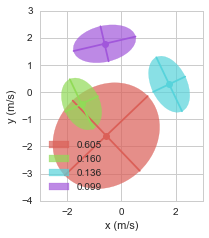

In [63]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [64]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.052      0.075  5.878394e-07      0.014       0.122

In [65]:
# Empirical Power
gofs_mean_set_bivar

Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                
(2001, 2006)    0.136884  0.095219  0.000002    0.023214     0.198635   
(1991, 1996)    0.278536  0.108569  0.000001    0.020623     0.183561   

              R_square  
year_lim                
(2001, 2006)  0.985732  
(1991, 1996)  0.987252

In [66]:
%%time
if df_all_years.index.year[0] <= 2000:
    # GMM test against previous data
    fig1, ax1 = plt.subplots(figsize=(3,2.5))
    fig2, ax2 = plt.subplots(figsize=(3,2.5))
    gofs_mean_set_bivar_previous = []
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    for year_length in [10]:
        color = next(prop_cycle)
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
           for sub_start_year in arange(start_year, end_year+1)) 
        gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
        gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
        gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
        gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
        gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar_previous.append(gofs_mean)

    print('10 year comparison')
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    align_figures()
    display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


10 year comparison


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAAC3CAYAAADtj5nqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3WdAVFfawPH/zNA7iooFFFCxogL2jib2TRAripo1MbpG
TUzRuPtqosmma6K7KZpoErPRRGM0JpYo1mCjiNhQqYI0kQ4DTLnvB3QioYowDHB+n+TO3HvPQZ65
d84953lkkiRJCIJgMOT13QBBEEoTQSkIBkYEpSAYGBGUgmBgRFAKgoERQSkIBqbegvLSpUsEBASU
2X7s2DH8/PyYPn06P/74IwBarZbVq1czffp0AgICiI+P13dzBUFvjOrjpFu2bOGXX37B3Ny81HaV
SsU777zD7t27MTc3Z+bMmfj4+BAWFkZxcTE//PAD4eHhvPvuu3z22Wf10XRBqHP1cqV0dnZm06ZN
ZbZHR0fj7OyMra0tJiYmeHl5ERwcTGhoKEOHDgWgd+/eXLlyRd9NFgS9qZcr5ZgxY0hMTCyzPS8v
D2tra93PlpaW5OXlkZeXh5WVlW67QqFArVZjZFRx80NDQ2u30YJQy7y8vMrdXi9BWRErKyvy8/N1
P+fn52NtbV1mu1arrTQgH6io06GhoRW+1piJfuvf0o+OE5uUg6WZEYM82jDCqx3dXR0IvxhW4T4G
FZRubm7Ex8eTlZWFhYUFISEhzJ8/H5lMxvHjxxk/fjzh4eF07ty5vpsqCOVSqTXsPRnNpKGumJkY
MWtMF9Raib5dW2FirKjWMQwiKPfv309BQQHTp09n5cqVzJ8/H0mS8PPzo1WrVjzxxBMEBQUxY8YM
JEni3//+d303WRDKiE3KZv33YcQl56BSa/Ef04X+PVo/8nHqLSjbtWune+QxadIk3XYfHx98fHxK
vVcul7N27Vq9tk8Qqkujldhz/BbfH45ErZEYN7ADviM61vh4BnGlFISGQKOVyMkvIiu3iMzcIjq2
s8PG0oRPd1/i9/PxNLMxZcm0Pnh3bfVY5xFBKQjl0GglJEnCSCHn0s27bN53mcTUXLQPrT5+47kB
eHVpxcQhLhSrNDz3dE9sLE0e+9wiKAXhPq1W4vC5OIIikrh5O4sl03oztHdbzM2MSMsooLOzPc1s
zbC3NsPe2hTH5pYAuLSx5eVZtTe6K4JSEIDk9Hw++eEiV2PuAeDUygrt/ctix3Z27HxrPAqFfuba
iKAUmjyNVmLN5rMk38tnYM/WLJzsQTMbM93rcrkMkOmtPSIohSYrPUuJvbUpCoWcBb49yVOqGN6n
LTKZ/gKwPCIohSZHkiSOXrjNln1X8PPpyPTR7o89YlqbRFAKTUpeQTH/2XWJoIgkLMyMaGFnXvVO
eiaCUmgU8pQqrMyNK33Ptdh7fPBdKOlZSrq7Nme5vyct7S301MLqE0EpNGharcTmvZfJK1DxyuyS
xxKZuYXYW5uVea9KpSUzp5BZY7swdVRnFPL6/e5YERGUQoOl1mj5ZOdFToQl4jeyI5IkcTs1lyUf
HqeHqwPDPdvSycmei9H5eHlBr84t2LxqtEFeHR8mglJokIpUGt7/NoQL11Lo0t6eKT6dkMlkFBap
6ebSnMvR6VyOTgdAJoMnh+Xg7Ghj8AEJIiiFBqhYpeGNLWe5En2PPp1bsGpeP8xMS/6U3ds3493F
Q0jLLOD0xTtciblHO9tinFpZV3FU/dBoJcJvplX6HhGUQoNjbCTHpY0tNpYmvDLLC2OjsusUW9pb
4OfTCT+fToSGhtb7s0eNRsvJi4n8ePQmd+7m84Z/uwrfK4JSaDDSs5Qoi9Q4tbLm2b/1QAKDHax5
QKXWciwkgd3HbpJyrwAjhYwn+7cHNBXuI4JSaBBCrqfy8c4wFHI5m14ZWSurMeqSRivx+/l4dgXe
5G6mEiOFnPGDOuDn04mW9haV5pASQSkYNJVay7cHrrH3ZDRGCjl/n9Qda4vKn0fWt7SMAtbvCONq
zD1MjOT8bagrk0d2pLlt9SYqiKAUDFZmTiFrvzpHVGI2bVtY8upsb9za2dV3syp16mIin+6+RH6h
mkEerVno64G9TdlnppURQSkYLGtLExRyOaP7OrPAtyfmpob751pQqOKLny9zLCQBMxMFy6b3ZlRf
5xoNMBluL4UmJ+VePqGRaVyNucfCyR7YWJrw1sJBuscdhioyPoOP/hdKyr0COjnZ8cosL9q0sKp6
xwoYdm+FRu9uppI9x28ReiON5PQ/c/u2cbBk9riuBhuQGo2WizfvEhh8mzOXk5EkiamjOuE/pgtG
j7kY2jB7LDR6kiQhk8lQKGT8GhSLuamC/t0d8ezSEk/3lrpUG4bmdkoOgcEJHA9NIDO3CABnR2sW
Tvagp5tDrZxDBKWgd0cv3ObM5SRWzetHMxszPlo2DJc2thgbGV5lxsJiNbduZ3Et7h4XrqZw83YW
AJbmxowf1IFRfZ3p5GRXq5MTRFAKeqPVSmw/eJ3dx25hZW5Mcno+Tq2s6exsX99N08lTqrh06y7X
YzO4HneP6MRsNPdz9chl4N21FaP6OtGvm2O1M54/KhGUgl4UFqvZsCOMMxHJtHGwZPWzA2j7GIMh
deHSrbt88F0I2XnFABgpZHRsZ0dXl2Z0c2lGN5fm2FqZ1nk7RFAKtSI5PZ/dx25hZ21K6+YWtGpu
SevmljSzMUMul/HON8GERabRw605r8/tZ1AzciRJ4qfjUWw/cA2ZTMbUUZ3wdG9JJ2d7TOvoalgZ
vQelVqvljTfe4MaNG5iYmPDWW2/Rvn173et79+7lq6++wtraGl9fX6ZOnUpxcTGvv/46CQkJWFlZ
sXr1ajp06KDvpguVyC0oJiwylfTswlLb/UZ2ZN7E7kwb1ZkWduY87+thUN8d85UqPt4ZxrkrKTS3
NWPlnL506dCsXtuk96A8evRohVWZMzIy2LhxI3v27MHGxoZ58+YxcOBATpw4gYWFBT/++CMxMTGs
W7eOr776St9NFyrR2dmej14cTmJaLsnpBaRm5JOcnq/7vtjdtTndXZvXcytLi03K5p1vgklOz8ej
owOvzvbGzrrub0+rovegrKwqc2JiIu7u7tjZlUyl6tmzJ5cuXSIqKophw4YB4OrqSnR0tL6bLVRA
pdaw53gUE4e40szGjGY2ZnjUvLaNXkiSxPHQBP67O4JilYYpPp2YPbaL3pItV0XvQVlZVeb27dsT
FRVFeno6lpaWnD17lg4dOtC1a1eOHz/O6NGjuXTpEqmpqWg0GhSKyu/3K5uJ31QrPdd2v4Ou5XIk
PJvY23d4ordtrR77URSrtZhUclv8oN+ZeWoOhGRxK6kQU2MZM4Y1p4ujkvDwi/pqapX0HpSVVWW2
tbXl9ddfZ8mSJdjZ2dG9e3fs7e0ZMWIE0dHR+Pv74+npSffu3asMSBCVnP+qtvudmVvIez8FYm1h
zOKZQ7C20P/gjUYr8eW+y/z6Ryy9O7dgwmAX+nZzLLXOMjQ0lF69+/DLqWi+//0GRcUaendqweKp
veptkoJBLd3y9PSssCqzWq3m2rVrfP/996hUKp555hleeuklLl++zMCBA1m1ahWXL18mKSlJ380W
yvG/Q5Eoi9Qs9O1ZLwFZrNKw/vswgiKSsDI3JvzmXcJv3qWlvTljB3bgyf7tsbUyJTG9iK83nCQu
OQdbKxNemNKL4Z7t6j0bQUX0HpTlVWV+uJIzgK+vL6ampjzzzDM0a1YyEvbJJ5/w+eefY21tzdtv
v63vZgt/EZuUzZHz8Ti1smbswA56P3++UsVb285zJfoePdya889n+pOepeRAUCzHQhP49sB1dvx+
g24uzbh0qySB1hP9nHlmUvd6+QB5FDJJkqSq39bwVHarJm5fH198Sg6f7r7E9NHueHZpWSvHrK57
2Ure2HKOuOQ

Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                
(1991, 1996)    0.134738  0.137023  0.000002    0.024684     0.219374   

              R_square  
year_lim                
(1991, 1996)  0.982288

Wall time: 9.33 s


In [67]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLHldL/rJrH3pfd+7q88cVFAYZoyrEIQyosC8GWQW
GEBGdFC8E/B4LuwXJ0ZFlquIAjMwIgNXnmwC14AwAkJiCAH1IcuMCxBcp9eqrq6ufV9zeX/U+WVn
ZeW+VFf2yU9Ex+nTVfn7ZVVlfurz3Sme53l48ODBwyUFfdEn4MGDBw9OwiM5Dx48XGp4JOfBg4dL
DY/kPHjwcKnhkZwHDx4uNTyS8+DBw6WGR3IePHi41PBIzoMHD5caHsl58ODhUsMjOQ8ePFxqeCTn
wYOHSw2P5Dx48HCp4ZGcBw8eLjU8kvPgwcOlhkdyHjx4uNTwSM6DBw+XGh7JefDg4VLDIzkPHjxc
angk58GDh0sNj+Q8ePBwqeGRnAcPHi41PJLz4MHDpYZHch48eLjU8EjOgwcPlxoeyXnw4OFSw3/R
J+Dh4sHzPLrdLhiGgc/nQyAQAE3ToCjqok/NgwfLoHie5y/6JDxcHDqdDiqVCiYmJtDr9QAA6XQa
MzMzmJiYAE3THul5cDU8JXcdg2VZtFot5HI5xGIxMAyDQCAAnufB8zxYlgXDMOh2u6AoCj6fzyM9
D66DR3LXIXieB8MwYFkWFEWBZVns7e2BZVn4/X5wHIdms4lQKAS///wSIaTX6XRA0zR8Ph98Ph/8
fr9Heh7GFp65ep2B4zj0ej2Qj/309BTFYhGbm5sIBoPodrvIZDKgKAq9Xg9+vx/RaBSRSATRaBQ+
n29gPbIORVEC2fn9/qHnefBwUfCU3HUCYn6yLAsAYBgGqVQKHMchEAhgYmIC3W4X4XAYgUAAU1NT
iMVi6HQ6aDabqFQqODs7E0iPEJ+YzBiGAc/z6HQ6Hul5GBt4JHcdgOM4MAwDjuNAURRqtRpOTk4w
OzuLyclJHB8fDzyfoijwPA+KohAOhxEOhzE7Owue59Fut9FqtVAul5HJZBAIBATCUyM9mu5nK/V6
PUxOTnqk52Fk8EjukoP40UgwIZPJoFqtYmNjQ1Bqej0WFEUJZCYmvWaziXK5jNPTUwSDwQHzlpAb
z/NotVrIZrNCAIP86yk9D07CI7lLCql52u12kUwmEQwGsbu7KwQUrAQLxKQH9BUjUXqlUgmnp6cI
hUIC4ZFjiFKUKj2P9Dw4AY/kLiGk5mmpVEImk8Hi4iJmZ2eHiE2q5AgJGQVN04K/bm5uTiC9ZrOJ
YrGIdrsNAMjn8wI5ipWeR3oenIBHcpcMYvOU4zicnp6i1WphZ2cH4XB46PlOpn2ISQ8AGo0Gstks
AKBQKKDT6SAcDgtKLxwOe6TnwXZ4JHdJwPM8zs7OEI1GEQqF0G63kUwmEYvFsLu7K5CH0rGAs4QH
9EmPpmnMz88D6CvOVquFZrOJfD4vkB7x6eklvWAw6OXoeVCER3KXACT3rVQqwe/3o1arIZfLYXV1
FVNTU6rHypGDWXNVC9K9aJpGLBZDLBYDcF6BQaowut2uYNYSpUfWkJJet9sFy7KYmZlBIBDwSM+D
AI/kXA5SuUBAzMHd3V0Eg0Fda4xLPrjP50M8Hkc8HgdwTnrNZhPZbBa9Xm9I6REyIwGPSCSCdrs9
UJHhkd71DY/kXAppaVa9Xker1cLExAQ2NjZ039RKzxsH4lMjvbOzMzAMI5AeIXqp0uv1eh7pXefw
SM6FEAcXAODs7AylUgnhcBjT09OWb+BxJQAp6TEMI5BevV4XUmaI0guFQh7pefBIzk2Q5r71ej2k
UilQFIXd3V2k02nDazrlfxsF/H4/JiYmMDExgVAohFarhXg8LiQnsywr+POi0ehAgEJMeiSQQYjP
I73LBY/kXAJp7lu1WsXJyQnm5+cxPz8/kGRrB9xIfDRNC6QH9JVes9kUytDEKk9KehzHCQEcMen5
/X74/X6P9FwMj+RcAJZlhYaWPM/j9PQUtVoNW1tbQg4aYE6VietUxX9zG+Ret9/vx+TkJCYnJwH0
lS8xb8vlMjiOG1B6YgUnJr1er4darYalpSWP9FwIj+TGGNLgAsl9C4fDuHLlipcQK4EW8QQCAQQC
gQHSI0qvWCyC5/kBpUdIjyhCYt5SFOUpPRfBI7kxhdg8BYBisYizszMsLS1hZmbGtvw2sY/Kyjpu
BGkpNTU1BZ7nB5ResVgEAEQiEaGRqFjxipWeR3rjDY/kxhClUgk+nw+hUAgcxyGdTqPdbiuWZhFc
L+TkBCiKQjAYRDAYHCC9ZrOJWq2GTqeDg4MDWaUHeKQ3zvBIboxAzNN8Po/JyUmwLItkMomJiQnN
0iwruAzkaPf5i0kvEAigWCxiaWkJzWYTjUYD+XweNE0LhBeJRBRJD8DAfAyfz+eR3gjhkdyYQJz7
RqKnjUZDV2kWgV1k5VbSc4o4eJ4XamSDwSCmp6eFMY4kR4/0yRMHMsQKziO9i4NHchcMae4by7Jo
NBqgadpQaRZgnpzcSmoXCYqiEAqFEAqFMDMzM0B6tVpNID1xq3gl0svlcpienkYsFhM6rHikZx88
krtAKLUl9/v9mJ6eNkRwHpyDNMVGDnKk1+l00Gq1UK1WhfkYYvOWkF673RYit91uFwCG5mN4pGce
HsldEKSlWZlMBuVyGevr66hWq6YuaiuKLJ/Po1qtIhwOC6MJPfRhVh2T+Rhi0pMbCiSOopPPnah7
6cxbj/SMw7uSRwxp7luv10MymYTf78eVK1eEVkmjMjvJDVar1bC4uDhQC9pqtQbMLTsCH06ZxXrU
lhXYUQ+sNBSIZVlhPoZY6YnJzCM98/BIboSQmqeVSgXpdBoLCwuYm5sTLlQriszIcc1mE8lkEhRF
YXNzU5jZQLoKkzpQ0ro8FAoJpCduaKkXbr0RnSBQ8XyMarWK5eVl8DyvOBTIIz3z8EhuRBD3feN5
Hul0Go1GA9vb28IgGAKnAwg8z6NQKCCXy2FtbQ3pdFq2rIvcXGReA1F54oaWhPTEHT88GIM4eqt3
KBBR1h7pacMjOYehVJoViUSwu7srW5plheSIb0cJDMPg5OQEDMMI0dt0Oq2pVpS6+DabTWQyGTAM
o9jxYxRwMjrstCkst76eoUBEWYuHAolJj2EYdLtdpNNprK2tIRAIXJek55GcgxAX1gP94S3ZbBbL
y8uYmZlRPE4PWSkdp3azE/N0cnISGxsbgrlp5oKX6+3WbDbRbDZRKpWEOlBx8bvTcOuNq4dEpUOB
xKSnNRSI+P1ImotY6QUCgQFyvIzwSM4BkNy373//+7hy5QoAIJ1Oo9vtIpFIIBQKqR5vd96a1Dwl
BerS51jxCYo7fohLosiQGpqmEQqFBIXhpujtRSg5LciRntxQoEgkMhS5BQaV3mUnPfdcaS6BtLC+
0Wggk8lgcnIS6+vrupz1dvrkWJZFKpUaME/ljrMT4pIocXUAqeI4PDwU0ifEkUQP5iF1J4hJDwD2
9/eFVvHSoUCAPOn5fD4hX8/NpOeRnI2Q5r6R4nol9aQGO0iOmKdk7oOesYRW9lc7r1AohMnJSTQa
DWxtbQmmFokkWo3cOolxVHJaIKQXiURQLpeRSCSESWjZbFZ1Ehpwfi1LW8W7kfQ8krMBxDxlGEbo
P5ZKpcDzPDY3NwW/lV5YNVd5nkexWEQ2mzU1ltDpC1icPgEM+pek81flbkA5kAilG+EkiZK1jQwF
Ek9CkwYyOp0OKIoaqsgYZ3gkZxFKpVmzs7NgGMbUBWD2gicBi2Qyqdv/Nw6Q+pfkbsCLjtw6SUKA
s80F5NaWIz3SQFT8npP3XZoiJJ55WywWMT09jUgkIpDlOBGfR3IWIM19y2QyqFar2NjYQCwWG2nl
AgB0u13UajV

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAAC3CAYAAADkZDmQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUFOf5x7/L4iLIKjUQVKiKqNFYNYqamDZRsRj1mChB
BUr05Ogx1sREq0GjR4k1VrTWX04bLzH2WCtqJWpbtT2xmuClsS1VUxQhKiIXuQgoXnYFWVzm98c6
w+wyMzuz7M7swvM5h+MyM++8z+D73ed5b8/oGIZhQBCEZvhpbQBBtHdIhAShMSRCgtAYEiFBaAyJ
kCA0hkRIEBrjr3aFO3bsQFZWFhobG5GcnIwZM2aobQJByKapqQlr1qzBtWvXYDAYsG7dOvTq1Ys7
n5WVha1bt8Lf3x8JCQmYOXMmAGXtXFURZmdn43//+x/+9Kc/ob6+Hrt27VKzeoJQzNdffw2LxYLM
zEzk5ORgw4YN2L59OwCgsbER6enpOHToEAIDA5GcnIzY2FgUFhYqaueqivDbb79F//798d5778Fs
NmPZsmVqVk8Qirl48SJeeeUVAMALL7yAK1eucOcKCwvRs2dPdOnSBQAQExOD8+fPIz8/X1E7V1WE
9+7dQ0VFBT7//HOUlZVhwYIFOH78OHQ6nWiZixcvqmgh4YvExMRIns/J+QZWa4jgOYPBgMGDB4uW
NZvNCA4O5n7X6/V48uQJ/P39YTabYTQauXOdOnWC2WxW3M5VFWFISAj69OkDg8GAPn36ICAgALW1
tXjmmWcky2WuPSXr/iaTGUZjsPMLfZi2/oxKny8xbZzTa6zWEET0XC94rrx0pWTZ4OBgPHr0iPu9
qakJ/v7+gucePXoEo9GouJ2rOjoaExODf/7zn2AYBlVVVaivr0dIiPA3FEF4A8OHD8fZs2cBADk5
Oejfvz93Ljo6GiUlJbh//z4sFgsuXLiAYcOGKW7nqnrCcePG4fz585g+fToYhkFaWhr0er2aJhCE
IuLi4nDu3DkkJSWBYRisX78ex44dQ11dHRITE/HRRx9h7ty5YBgGCQkJCA8PR3h4uKJ2rvoUBQ3G
EL6En58f1q5da3csOjqa+xwbG4vY2NgW5ZS0c5qsJwiNIREShMaQCAlCY0iEBKExJEKC0BgSIUFo
DImQIDSGREgQGqP6ZD1BaMHdxwVamyAKiZBoFxRjrODxbuqaIQiFowShMSRCgtAYEiFBaAyJkCA0
hkRIEBqjyejo3bt38eabb2LXrl12e7MIwttwNeVhfHw8l5smMjIS6enponWoLsLGxkakpaWhY8eO
aldNEIpxJeWh0WgEwzDIyMiQVYfq4ejGjRuRlJSEZ599Vu2qCUIxclMeGgwGLuXh1atXUV9fjzlz
5mD27NnIycmRrENVT/jnP/8ZXbt2xSuvvIIvvvhCdjmTyeyRa32Vtv6M3vR8rqQ87NixI+bOnYsZ
M2aguLgY8+bNw/Hjx7ksbY6oKsLDhw9Dp9Ph3//+N77//nssX74c27dvR1hYmGQ5uSnw2no6QKDt
P6O3PZ8rKQ+joqLQq1cv6HQ6REVFISQkBDU1NejevbtgHaqGo/v27cPevXuRkZGBgQMHYuPGjU4F
SBBa4krKw0OHDmHDhg0AgKqqKpjNZsl2TmtHCUICV1IeTp8+HStWrEBycjJ0Oh3Wr18vGooCGopQ
7sgRQbiDkrpSwePOFnC7kvLQYDBg8+bNsm0jT0i0Cx40vay1CaLQihmC0BgSIUFoDImQIDSGREgQ
GkMDM17IjTv1gsf7hgaqbAmhBiRCjRATGgBED+4peJwBUFFlhr5BvCxAYvU1SIQq4Sg6MaE5o3t0
qN16RcG6cpvnxEiQ3g+JUAVYAboqPKXw62EFSWL0XkiEHsQV8eXdvy953mq1Qn//PgbJfM149OCe
KMwt5WwhMXofJEIPIUeAYoKL7i++mMpkMqG68pFgWTFhsjawYiQhehckQjfD7/uJCZAvICnBiSFW
Ju/6be6zkCBZe27klpIQvQgSoRtx5v1aKz5n8O8pJcjowT3bXV/x2sNKweMTvEABXmBC20BKgKz4
5AjvsumO5Hmr1Qq9qQFDjKGS17F1FV6/jTyBPiS/r9gehOjfNFhrE0QhEbqB1ghQSHT9osTz75hM
JhiNRlwuqhY87yhOtl7WM/LF2N6E6AquZlsD5GcVVFWEjY2NWLlyJcrLy2GxWLBgwQKMHz9eTRPc
jpgAlYhPSnRiiJVxFCcryuj+3TivCDSLkYQojSvZ1kJDQxVlFVR17ejRo0cREhKC/fv34/e//z0+
+eQTNat3O0oFeNl0h/vpF/Us9+NOHO/LF3t0/27NnpHfP2UHbCRW8bRXXMm2BijLKqiqJ5w4cSJe
e+01AADDMNDr9bLKeWO2tYo627/do0NhMpm440UWi+14ZGe74zestgIR4cFP7Ww+pxS5Zbs99Wz/
q6oCAPTVBwEAnu3eCZVlD3H57l1EGQy2Y71/gMrCO7hWZUaPIJdNcwu+nm1NaVZBVUXYqVMnALYH
++CDD7B48WJZ5bwt29qNO/XQ64U9oF6vt/OArCca0Fc405ZS2D6hEgYYjSgoqkYRmgd0jAONKLx+
G6VWKxeaGl8wojC3FFUN2o2atoVsaxkZGYqyCqq+lamyshKzZ8/G1KlT8frrr6tdvduQE4KyAnR3
yOkKbIjKhsMAKDSVgSvZ1pRmFVTVE965cwdz5sxBWloaRo8erWbVbkOocboiwEt1NbLqGxokPyWk
2D359+gX9SwKiqpx2XQHQ4yhdgM2NFjTEleyrSlFxzAM4wHbBVm3bh2++uor9OnThzu2c+dOyRGk
ixcvInPtKVn393QoIzUQI0eAjiIZECktsKtltuv5IuKHo0Kic7wnew/H+xQ8HUVlw9NCgSmMQg0m
9JX+HyamjUNMTIzkNRcvXsR2yyXBcwsMQ52W9zSqesJVq1Zh1apValbpdlwRIF8szoTHh732koMY
ldyPPX+1rIYrNzQojDyiF0HpLWRy4069aD+QRUqAAyLDFAkQsAlHyBvyP/OvkYJfP2uT4zSG0Jwm
9RE9D4lQBpK74B0arpgAleAoPqF+IXtcSZ+Rb4uUEB2/XNTaB9lekRRhbW0tPvvsM8THx2P48OEY
MWIE3nzzTWzduhW1tbVq2egVyAlD3SFAFqUCk+MNWVivKCZEQHibFXlDzyDaJ9y3bx9OnDiBCRMm
YMOGDYiIiIC/vz/KysqQnZ2NhQsXYuLEiZg9e7aa9qqO1Ggoi+P6z9YIUImYWIYGhckebeUzIDKs
ub/J7yNK9A99lbzaKuET7t/MohhREYaHh+OPf/xji+N9+/ZF3759kZKSgn/84x8eNU5rpBZmi4Wh
l+pqWojvkqV5G81Qg/NJe6UhJsvVspZ1C9nAt2NAZBg3aMMKEWhea+qIrw7S9NT11toEUUTD0Z/+
9KfcZ8vTpVglJSU4ffo0mpqaAIBbgtaWURKGCnkjtvEP7BbG/e4oCHcgJVy+DXw7WPjCZSf0WYQm
8gn34nRgZsuWLVi1ahUqKiqQkpKC3bt3Iy0tTQ3bNEVoNNQRoW1I/AbtKEC+CNSGXy9rB/8Lgd9H
BGzPJrSiBqC+obtxKsKsrCysW7cOf/vb3/DGG29g9+7dyM/PV8M2r8PRCwIQ9IJs45YSnSe8oVKE
vOKluhq7ASbH5yVv6H6cirCpqQkGgwGnTp3CmDFj0NTUhPr6tv1NKOebXswLOno/llKmmPss1Pg9
BftlIAbfFrlhKUDe0J04FeHo0aMxZcoUNDY2YuTIkXjrrbdavBSxLeJsYh4QH4wRE6CQEL0BRyGK
haUsNIHvXkRFeObMGTQ0NGD58uX44osvkJmZCT8/P6xevRqpqalq2qgqcibm+R7CMQzli6uUKUYp
U4xBXcMxqGs

## 6.3 Univariate Goodness-of-fit

In [68]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

Speed Distribution Comparison
(0.98173925858561617, 0.87709339850790724, 0.99256173862574193)
Wall time: 18 s


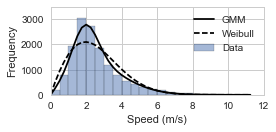

In [69]:
%%time
x = arange(0, max_speed, 0.5*BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max(), BIN_WIDTH), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed)*BIN_WIDTH,'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em, BIN_WIDTH))

In [70]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in  x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EXM+yLIouiJigqqKkXQVFzF/m53RZXQC+2
eK9p3VwumlppZm5dl5tZri2Wae6llEtpLoVLOIpmKrkimEAqLsMg25zfH8QIogjKcAb8PB+PHg/n
nDNn3pjz4Xu+53y/XytFURSEEKIMadQOIISofKSwCCHKnBQWIUSZk8IihChzUliEEGVOCosQosyZ
tbAcPXqUyMjIItt//PFH+vXrR1hYGGvXrjVnBCGECqzNdeJly5axefNmHBwcCm3Pzs5m5syZrF+/
HgcHByIiIujatSseHh7miiKEKGdma7F4e3uzYMGCItvPnj2Lt7c3VatWxdbWlqCgIGJjY80VQwih
ArO1WLp3705SUlKR7Xq9HhcXF9NrJycn9Hr9A8+n0+nKNJ8QouSCgoJKdbzZCsv9ODs7k56ebnqd
np5eqNAUp7Q/nLnpdDqLywSWlctoNHL8+HE++eQTEhIScKlWE93R3zh36giZGff/haLV2mCl1WJj
a4/WxgFrW0ecXKpSp/7fcHRxJe2GASsUatSojr1jFewdXbhq0OLo5MITNaqhtbElKfWvf2dWUKe6
MwCJKXrT63SDASdHR5KvGsjONZqOSb5qIDvHiI21Bi93R9M2wPT6XtvK4n0uDpgylcXn3esYgFoe
zoyLbFnM/7k7HuaXerkXlvr165OQkMD169dxdHTk0KFDDB06tLxjCDNKSkri008/5fPPPychIYHc
3Nwix9jaO+HgXA07p2q4etSiRm1fPGrWx93Lh/RcJ2zsHE1fhMSUvAJU8MtRsEDkU/4qENa2dqbj
s3OM2GjvXPHbWBe9+q/iZMPN9OxCr6/eyKSKk22hbWBV5H0Ft5XF+xRjVpl+3r2OAQgJ9i7y91CW
yq2wREdHYzAYCAsLY8KECQwdOhRFUejXrx81atQorxjCDBISEpg/fz6bN2/m9u3bXLp0qdB+O0cX
qrrXpmr1BnjWDaS+fzPc/+qsT0zRF/ltmp6iJzvXaHqdXyDu3na3hy0QjvY2hAT7kPDHTZKvpdPg
iWqEBFcxvfZyczJ9EXf+cvG+28rifWcTU6nl4Vxmn3e/YwL9qz/w/+ujsKooo5stqXmfzxIzQfnk
unjxIm+88Qbfffcd169fN23XWtvg0yiYBv7NcKz2BLXrB2Jj50C6wcC1W3mF4e6me8HLkPxtcKc5
b7idzdUbmYXeZ7idDVjhaF/4d2Pb5rUKfYl8at3/i3c2MZX6daqXyxetpCzx39TDZCr3SyFRcd26
dYuVK1cSHR3N9u3bTZc4Nrb21PRpjO/fQmka3A1raxsgrzWSrdhg89f779XyuLuVkb+tYKvC0T7v
DG5VHcjKzi22JVDSAhHoX90iv8SVhRQW8UAnTpzgn8Ne5cC+PeQ3cH39nsSuyhM0b/csNX0amzoJ
s3KssP7rX5WNtYab6VmmVkX+pUnBPo+7L0NKWzQspaUhCpPCIu7JaDSyZcsW3nzzTY4dO2ba7lbD
h56Rk8i1q0kVJ1tT0cjOyWuFFCkkNzNN771fy+N+xUGKRsUlhUUUoigK7y9ewX9nvkty4hnT9ica
BNC13xjcauS1JhJT9IWKyL0ucxztbXCr4oBbFXvOJhpMnZJSMCo/KSzCZOfOnbzy2ih+P/kbVlYa
Gv6tMwD12wzG26duoY5SG2tNkb6Suy9zAAZ086tU/RmH41PZ8ctFkq+m4+XuRDcplPckhUXw66+/
MnLkSHbv3g2Aja0DA/49n+pPNATy7tIUbJ1A0U7X0l7mVESH41NZseWE6fXlK3rT64f9OQ8ePMjo
0aNp0KABiqJw/fp1XnnlFXr16nXP4//44w9OnTpF165dH+rzyosUlseYwWBg6tSpzJ4zB+Nfd3hs
7Z1p98y/8azdwHTc3X0lcP9O18pUSO6245eL99y+85eLj/Rzt2nThv/9738AxMTEMHfuXOrVq0fj
xo2LHHvgwAHOnTsnhUVYpq1bt/LKK69w4cIF07ambf6O31P/wMrGiYzMXFMLpWBfyeNSRO4l+Wr6
vbdfu/f2h2Fvb09YWBhbtmzhyy+/JDk5mdTUVLp27crIkSNZunQpt2/fpkWLFri4uPDhhx+iKArp
6emmgmQJpLA8ZvbEnmb0yNeIO7AdjVZLcEg4ly/G06Jjf3yffMr0MNrdlz75fSWPMy93Jy5fKTq+
ycvNqUw/x93dne+//54ePXowYMAAMjMz6dixI2PGjGHYsGGcO3eOkJAQVq5cyezZs6lRowaLFy9m
27ZtjBgxokyzPCwpLI+Rz9duZeSIl7h5LRk7BxeeHTqDXKe6/K2rHU4OeX0k+X0ltwzZaDRWj23r
5F66BXsX6mPJV9bjbv744w9atGjBr7/+yoEDB3B2diYrK6vIcTVq1GD69Ok4OjqSkpJCYGBgmeZ4
FFJYHgNGo5F58+YxfsIEjLm5aK1tycy4xdWUC3j6+XLLkG0qLJBXXBo8Ua3Eo18fF/nF9WGf9i0J
g8HAunXr6N+/PxkZGUydOpWEhATWrl2LoihoNBqMxry7cZMmTeKHH37A2dmZ8ePHY0mjc6SwVGKH
41PZtPMYX3z4FhdOHsTOwZmc7EyMxhxCw8fzZHCPvEufuzpmwfyjXyuqQP/qZd56O3DgAJGRkWg0
Gq5fv85rr71GvXr1iIqKIi4uDltbW3x8fEhNTcXPz49Fixbx5JNP8swzzzB48GAcHBzw8PAgNTW1
THM9CiksldTh+FTmL9/GpmUTuXH1Dzxq1edq8gU0Gi1PvzgN3yfbAtIxq7bWrVuzf/9+0+uCz/ts
3ry5yPE1atRg+/btAPTu3bt8Qj4EKSyV1LIVm1j7wVhuG27SOjSSRkGhfPPxGwT1fA3fJ4MLHSsd
s6KsSWGpRPKfCv3+u/XsWj8XRVFoFTKINj1exMrKiufHLyczR6GWh7O0ToRZSWGpJA7Hp/LFd79x
6MfVxHy3FBs7R+oF9CR25yoA2vX+Fxqtlvo1Sj4loRAPSxYsqyR+OJjAvq2fEPPdUpyqeNC6x784
HfsNNvZONArqZjpOOmVFeZAWSyWx6atFxO5YiatHbYJ7/otda2ah0WjoOHAynrV85bJHlCspLBVU
wVG2J/etZf+2z6jiVpNnhs5g3UejyMnOovfzU+jYtatc+ohyJ5dCFVD+KNvLV/Qc2rWGbesW4uxa
nd5D/4tbDW/a9n6ZLv1G0aB5B7n0qQASExMZOXIkAwcOZNq0aQwbNozTp0+zYMECGjduTEpKiunY
q1ev8uSTT7Jx40aSkpLw9/dn6dKlhc43fPjwey5tXJ6kxVIB5Y+yjfvpa37avAjnqh70HT4Ha6tc
ank4k9G8o8VNEl0RjBs3jnXr1pXpOQcMGMDs2bPvuz8jI4MRI0bw7rvv0qJFC3Q6HTY2NkydOpXg
4GDq1q3L1q1beeGFFwDYsmULNWvWNL3f29ub7du3M2zYMADS0tJISEhQfcliabFUQMlX0zn32z52
f7MARxc3+o2Yx+9HfmT5e0Np5HqZf3WvwbjIllJUKoBdu3bRpk0bWrRoYdrWvHlzvvjiCwB69erF
tm3bCh3fpUsX0+tq1arh7u7O2bNngbxR6z169Cin9PcnLZaKKCOZrV9Ow9raluf+NZObackc+P5z
qrl70a5dO86fP692wgpp9uzZxbYuzCEpKQlv7zuXq3PnzkWr1ZKamkrLli1p2rQpDg4OJCYmYjQa
8fLyws7OrtA5evfuzXfffcfIkSPZuXMn//nPfzh06FC5/hx3k8JSARTsqHWxzWbVgnFkZ2bQa8hk
HJyr8fWS19F

0.0305198871241 0.0738193687294
2.25 2.75
Wall time: 30 s


Direction Distribution Comparison
0.97654040379
Wall time: 9.51 s


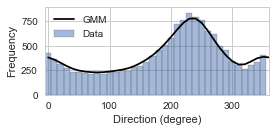

In [71]:
%%time
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, y[:-1]))

In [72]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012187  0.998669      0.923606
(1997, 2002)  0.009181  0.999039      0.959555
(1991, 1996)  0.011546  0.998940      0.926596

In [73]:
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

    x = bins = arange(0, df['speed'].max() + 1)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x, weibull_params)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN8AAAC3CAYAAACSXosbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlclNX+x9+zsO+bILKIqOACLqCCKO5LpuVuLrj+Kr2W
aWWaZmp2W01v2dWrmZV2yyyXMpdMXChFFBRREFE2Bdn3fZl5fn+QcyVEUZEBOe/Xa14v5sxzzvP9
Psxnzn6+MkmSJAQCQYMj17YBAkFzRYhPINASQnwCgZYQ4hMItIQQn0CgJYT4BAItoTXxXbx4kYCA
gBrpx44dY9y4cUyaNIldu3YBoFarefvtt5k0aRIBAQEkJiYCkJiYyOTJk5kyZQorV65ErVY3qA8C
wSMhaYEtW7ZII0eOlCZMmFAtvby8XBo8eLCUm5srlZWVSWPHjpUyMjKk3377TVqyZIkkSZJ04cIF
ae7cuZIkSdKLL74onTlzRpIkSVqxYoV05MiRhnVEIHgEtFLzOTk5sWHDhhrpsbGxODk5YWZmhq6u
Ll5eXpw7d46wsDD69u0LQNeuXbl8+TIAkZGR9OzZEwB/f39Onz7dcE4IBI+IUhs3HTZsGElJSTXS
CwsLMTEx0bw3MjKisLCQwsJCjI2NNekKhYLKykokSUImk2muLSgouO+9w8LC6sEDgaDueHl53TVd
K+KrDWNjY4qKijTvi4qKMDExqZGuVqtRKpXI5fJq15qamtbpPnd7GGFhYbU+pCcBSZLIyisl9PxF
OnXqBIClqT5GBjrk5Jdy8VoGN9IKSEwp4EZaPmnZxXz0Ul/cW1ty8nwSa/8bhkIuw87KEGtzA0wM
dZn2VAda2RhzM62AqPhsjAyU6OsqMdCrerVqYYyejoKSskoKiytQqdWo1RIqtYRaLWFnbYSejoKy
ChXlFSp0FHJkchkVlWoqKlSYGOmiVMjJKSglI6dEk/d2OW7OlhjoKYmKz+JsZCo5BWXkFpZRWFwO
qlIWz+iDnZUR6TnF5BWWYWVmgIGeEl0dBQq5rM7PTq2WqFBV2VReqUapkKOvq0BHKdf8+NfGvX7s
G5X4XF1dSUxMJDc3F0NDQ0JDQ5kzZw4ymYzjx48zYsQIwsPDad++PQAdO3YkJCSEXr16ERQUhI+P
j5Y9aDxIUtUXXKGQExmXxdr/hpGZW1L14YE0ABZP88K/mwOxyXl88t15TV5TI106t7FG/deyX68O
tmx+cxAtLAxRKmr2VBxtTXC0NamRfpvbYqwNPR0FejqKau8x0NG8tzDRx8JEv9b8HV2s6OhiVS0t
LCwMOysjAFpYGNLCwrDW/PdDLpehJ69uY33QKMS3f/9+iouLmTRpEkuXLmXOnDlIksS4ceOwtbVl
yJAhnDp1iueeew5JknjvvfcAWLJkCStWrGDdunW0adOGYcOGadkT7VFYUkFsUi6xSblcu5lLVHw2
zw1pz1O9XbA2N6C8QoWvR0vKS/KxsbFBBpovZztHc14c44GTnQlOtqaYm+hVK9vYQAfjO8QgqB9k
ktS8djXU1rxs7M1OlUpNbmEZWXmlZOdXvWwtDfFytyWvsIxpKw9Xu97MWJeJg9rzjL8rUNV0kstl
jd7P+qKx+HkvOxpFzdcYqahUE3MjB1vLqj6ONskpKGX2miNUqqr/Tvp3bYWXuy1mxnr07doKW0tD
2jqY4+pghq2lYbX+iPwB+jiChqFZii+/qBxTI90a6ZIkcTUxh2NhN/kzPJmC4goA1i7oi5uzJZm5
VZ3+FpYP33+oC7kFZfx+NpHM3BLmjeuChYk+w31ak/vXoIGlqT6WZvo4tvjfCPAbAd6P1SZB/dMs
xTf17UO0sDDA9a9aoms7GwBORdziw+2hAJib6PGUb2tyCkpp08oMgF/+iGPvietYmxvg2sqM1i1N
cW5piq9Hy7sORDwIt4X/65/xnIpIplIlYaCnZPqIjhgZ6PDiWM9Hc1rQ6GiW4uvu3oLYpFyCL6UQ
fCmF3IIyvJ3Ay92Wgd6O+HdrRdd2Nij+Jqh2Dub4dLYjOiGHkMhUQiJT0dNV4OdpD8Ch0/HkF5XT
s5MdrVua3ncY+k72nYxl2/5IABxtjRnR24UBXo4YiYGOJ5ZmKb7Vz/tq5r2uJ+ViY25AblosBnpK
Fk3uXmu+vt1a0bdbK6CqH5aYkk9OQZmmP3XwdAIJKfl8ezgaGwsDena0w7dzS7q0r6pZs/NLUasl
JAnKKio5eT4Zz3bWeLha4+vRkqj4LEb2aYNnW+sHEq6gadIsxQcgk8mwNjfQDKaEpT1Y/rvNPb0/
vw/no9MIiUwlLDqdA6fiSckq0ojv+feOUl6hqpYnKb0AD1dr7KyMWD6r18M7pGXuXG0kqBvNVnyP
A2MDHfy7OeDfzYFKlZqo+KxqfcG+Xe2prJSQyUAmq5oc7t/dQYsWPzzFpRVEJ+QQGZ9FVHwWMYk5
WJkZ0N/Lgf5eDthbG9+/kCeI0rJK9O+xkOBuCPE9JpQKOZ5tbaqlLXyu9iZtY0eSJGKT8vgjPJnw
mAwSUvJQ/zXzIZNVrXJJyy7m+yNX+f7IVdycLRjg5UifLvaYGevdu/BGSH5RObpK+X0FVV6h4qv9
kfx6Kp4OrS15qndr/Dzt0a3DahghPsE9SUzJ54/wZILCk0nJrFpfq6OU08HFio4ulnR0scK9tSXG
BjqUlFUSfCmFE2E3uXgtg6uJOXyx7xJtWpnR1sGcto7mtHM0x9HW5JFHhx8HKrVEWHQah4MTCLuS
hqG+DtOGuzPct3WNwTeA5IxCPtoeStytPMxN9IhOzOZKQjZf7LvEoB5OPOXb+p73E+IT1KCiUsWR
kBscPB3PjdSqnSJ6ugr6dm1F366t8HJvcddfdgM9JQO9HRno7UhWXgl/hCfzZ/gtYpPzuHYzF4Kr
rtNRynGxN6V1SzOc7UxwbmmKs13NZW0NRVZeCUdCbnAkJFGz/rVNKzNSs4r4z95LHD6TyAujPfBo
a63Jc+J8Eht/CqekTMXQXs48P7ozuQVlHA5O4Oi5G+w7Gcu+k7GsmlJ7t0KIrxmRV1hGeWXtu/1v
i+7HwBiy8krRUcrx9WhJ3y6t6NHR9oH6NFZmBozu15bR/dpSUakmMTWf6zdzuZ5U9YpLziPmRm61
PGbGurg6mOPnaU9vj5YYG9ZcCFEf5BSUEp2Qw9XEbKITc7gSn4VaAgM9BcN9WzPMx5m2DubkFpSx
/WAUR8/dYNmmU/h1sWfqMHf2nrjO72dvYKCn4PWpXvT7q99uZ6Vk5shOTB3uTvClFA4FJ9zTDrG2
8z7pTwIqtcT3R6LZdTQGGdDW0ZyOLlZ0alO1G8BAT1FNdLo6Cp72c2Fs/7aPrTaqqFRzK6OQxNR8
ElMLSEzJJyGlaisTgFIho7ubLX27taJXJ7t77oq4G3f+PyVJ4sLVDI6H3eRKQrbmHgByWdXzGNLT
Gf9urTDUrzmvGnMjhy37LnE1MUeT1qaVGUsCvLG3uffAkljb2YzJzi9l7bdhXIrNpIWFAbpyFbFJ
VbXOvpOxQFVzsaSsEl0dBWP6t32soruNjlJe1dxsWX0PZmpWEX+EJ/NHeDJno1I5G5WKro4Cl5am
KJVydBRylEo5SoUMpUJOm1Zm+HRuiUML4xpTHSq1RPClW/wYeI245DwATAx18O5gi3trC9ydLWnn
aH5Xwd1JeycLPnqpLyfO32TX0Ri83G2ZObIjOspH22Ikar77pDdlLlxNZ91358ktLMPXoyULJnXj
alQEnTy6EHMjh8i4bKLiskjOLKRPl1YNIroH4WZagUaIKZlFqNS1f1Vb2Rjh07klPp1b0qaVGd/s
PUVYXDnJGUXIZODnac/YAW1p62DeoPORouZrZtzZzFTIZbww2oORfVw0Xzp9XSWebW1qTIU0Nhxt
TZgyzJ0pw9y

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.027752      0.072285  0.987022      0.906827   

              r_square_weibulll  
year_lim                         
(1991, 1996)           0.913314

#### Energy Evaluation

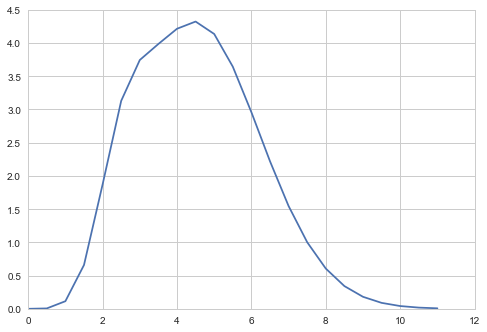

In [74]:
x = arange(0, max_speed, 0.5)
y_ =[]
for x_ in x:
    def sub_f(theta, V=x_):
        return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
    y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
y = array(list(zip(*y_))[0])
plot(x, y)

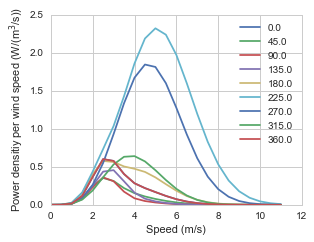

In [75]:
for rad in  linspace(0,2*pi, num=9):
    x = arange(0, max_speed, 0.5)
    y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
    plot(x, y, label=rad/pi*180)
plt_configure(legend=True, 
              xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
              figsize=(4.5,3.5))

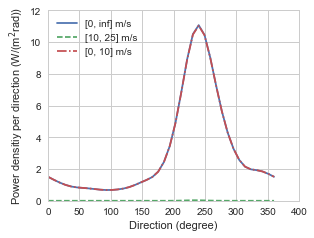

In [76]:
for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
    rads = linspace(0,2*pi, num=40)
    y_ =[]
    for rad in rads:
        def sub_f(V,theta=rad):
            return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
        y_.append(integrate.nquad(sub_f, [integrate_interval]))
    y = array(list(zip(*y_))[0])
    plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
plt_configure(legend=True, 
              xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
              figsize=(4.5,3.5))

## 6.4 Sectoral Comaprison

In [77]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df), BIN_WIDTH))

(12.189570518064773, 8.5945178248418497, -0.060697956991871971, 23219.706576842531, 0.95846065786377976, 0.95854275142531375)
Wall time: 8.49 s


In [78]:
# densities = []
# densities_expected = []
# bin_num = 0
# for density_curves in density_collection:
#     densities.extend(density_curves['density'])
#     densities_expected.extend(density_curves['density_expected'])
#     bin_num = bin_num + ceil(density_curves['max_speed'])

In [79]:
# print(len(densities), len(densities_expected), bin_num)
# SS_E = np.sum(np.power(np.asarray(densities) - np.asarray(densities_expected), 2))
# RMSE = np.sqrt(SS_E/bin_num)
# RMSE, RMSE*len(df)

In [ ]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+bin_width, bin_width)
        density, _ = np.histogram(sub_df['speed'], bins=bins, density=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+bin_width],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density*bin_width, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed+bin_width, bin_width), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

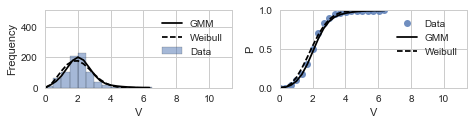

5.0 (-5.0 - 15.0) degree
data size: 790 weight 0.05407995618838992
GMM Weibull
R square 0.954641361362 0.900978059674
max diff: 0.0801343795175 0.0821081168373 speed value: 2.34707215449 1.67648011035 y gmm 0.633789671115
 


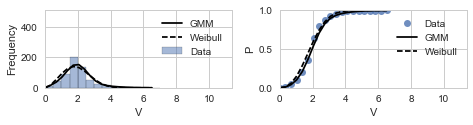

25.0 (15.0 - 35.0) degree
data size: 586 weight 0.04011500547645126
GMM Weibull
R square 0.918350145612 0.870348798872
max diff: 0.0925131424901 0.087863836954 speed value: 2.05811363086 1.71509469238 y gmm 0.545712113483
 


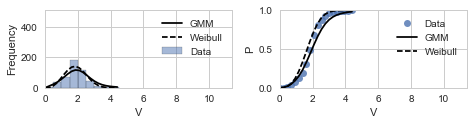

45.0 (35.0 - 55.0) degree
data size: 467 weight 0.031968784227820374
GMM Weibull
R square 0.807774357062 0.901031229222
max diff: 0.141025647203 0.162483468764 speed value: 2.31585112925 1.62109579048 y gmm 0.666254866715
 


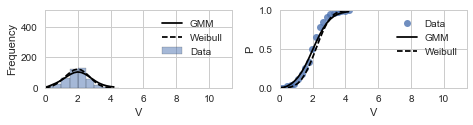

65.0 (55.0 - 75.0) degree
data size: 436 weight 0.029846659364731652
GMM Weibull
R square 0.882687880278 0.963301964187
max diff: 0.106962666221 0.164080593658 speed value: 2.42700930274 2.42700930274 y gmm 0.684321737449
 


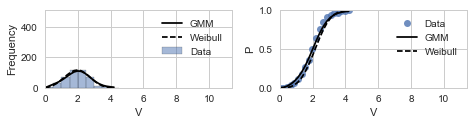

85.0 (75.0 - 95.0) degree
data size: 436 weight 0.029846659364731652
GMM 

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

In [ ]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

## 7.1  Result Variability

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(12))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

In [ ]:
sss

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
# %%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 5
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)